This workbook works through the EDA for the PetMatch project. 

It uses the `petpy` package and its methods for interacting with the Petfinder API. The goal of the `petpy` library is to enable other users to interact with the rich data available in the Petfinder database with an easy-to-use and straightforward Python interface. Methods for coercing the resulting JSON data into [pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) are also available to help facilitate users who are more interested in using the API for data analysis. More information on the Petfinder API itself can be found on the [API documentation page](https://www.petfinder.com/developers/v2/docs/).

Findings are documents in the workbook and SweetViz EDA output is shared in the repo along with this book and the data used to generate the below findings.

# Table of Contents

* [Obtaining an API and Secret key](#api_key)
* [Installation](#installation)
* [Initial Database EDA](#database_size)
* [SweetViz- Auto EDA](#sweetviz)
    - [Initial EDA findings from SweetViz](#sweetviz_findings)
* [Follow-up Questions](#followup)
    - [How many missing values for list columns](#missingValues)
    - [Animal type impact on missing values](#byAnimalmissingValues)
    - [Duplicate ID Check](#duplicateRows)
    - [Org Names for those posting baby animals](#babies)
    - [Distinguish cats from each other](#distinguish)
* [Data Augmentation Possibilities](#aug)
* [Conclusion](#conclusion)

# Obtaining an API and Secret Key <a id='api_key'></a>

Before we can begin extracting data from the API, we first require an API and secret key to authenticate access. To receive an API and secret key, [create a free account with Petfinder](https://www.petfinder.com/developers/) on their developer page and request an API key.

The API and secret key received from Petfinder are what we will use to authenticate our connection to the Petfinder API with `petpy`. Note authenication has a timeout of 3600 seconds, or one hour, after which the authentication to the API will need to be made again. For more information on how the Petfinder API authenication works, [visit the API documentation on the Petfinder developer page](https://www.petfinder.com/developers/v2/docs/#using-the-api).

Storing your keys received from APIs and other sensitive information in a secure file or as an environment variable is considered best practice to avoid any potential malicious activity. Therefore, we save the API and secret keys we received from Petfinder as environment variables to keep our credentials safe. For Mac users, here is a good [StackOverflow question](https://apple.stackexchange.com/questions/329865/add-environment-variable-to-path) on how to set up environment variables. For Windows users, this appears to be a good website on how to [add environment variables](https://www.computerhope.com/issues/ch000549.htm) for different versions of windows. We can then access these environment variables using the `os` library

In [1]:
import os
import secrets_petfinder

#key = os.getenv('PETFINDER_KEY')
#secret = os.getenv('PETFINDER_SECRET_KEY')
key = secrets_petfinder.PETFINDER_API_CLIENT_ID
secret = secrets_petfinder.PETFINDER_API_CLIENT_SECRET

# Installation <a id='installation'></a>

If not already installed, install `petpy` using `pip`:

``pip install petpy``

Then, import the package.

In [2]:
import petpy
import pandas as pd

Now that `petpy` is imported, we can authenticate our connection to the API and begin extracting data! The authentication to the Petfinder API occurs when the `Petfinder` class is initialized, which requires the API and secret keys we received in the previous step as parameters.

In [3]:
pf = petpy.Petfinder(key=key, secret=secret)

The `pf` variable is the initialized Petfinder class with our given API and secret key. We can now use this instance to interact with and extract data from the Petfinder API.

# Initial Database EDA<a id='database_size'></a>

`Animals that were 'found' in the system number 4000. Found appears to be when you find a match but not adopted physically yet.`

In [17]:
allAnimalDF_F = pf.animals(return_df=True,status='found',results_per_page=100, pages=100)
allAnimalDF_F.shape

pages parameter exceeded maximum number of available pages available from the Petfinder API. As a result, the maximum number of pages 41 was returned


(4000, 50)

`Animals that were 'adopted' in the system number are 35,800. Nice`

In [18]:
allAnimalDF_AD = pf.animals(return_df=True,status='adopted',results_per_page=100, pages=500)
allAnimalDF_AD.shape

(35800, 50)

`Animals that are 'adoptable' in the system number are a LOT.`

In [23]:
allAnimalDF_A = pf.animals(return_df=True,status='adoptable',results_per_page=100, pages=500)
allAnimalDF_A.shape

KeyError: 'animals'

In [33]:
pd.set_option('display.max_columns', 500)
allAnimalDF_F.sample(5)

id organization_id  \
1733  57399292          TX2046   
3956  26446124           OH235   
471   58887781            MD33   
3199  54609972           MD477   
3555  51580081           MI957   

                                                    url           type  \
1733  https://www.petfinder.com/cat/angel-57399292/t...            Cat   
3956  https://www.petfinder.com/dog/371suzy-q-264461...            Dog   
471   https://www.petfinder.com/cat/ginger-bug-58887...            Cat   
3199  https://www.petfinder.com/small-furry/george-a...  Small & Furry   
3555  https://www.petfinder.com/dog/milo-51580081/mi...            Dog   

         species     age  gender    size   coat                          tags  \
1733         Cat    Baby    Male  Medium   None                            []   
3956         Dog   Adult  Female  Medium  Short                            []   
471          Cat   Adult  Female  Medium   None                            []   
3199  Guinea Pig    Baby    Male  Medium  Short  [Friendly, Playful, Curious]   
3555         Dog  Senior    Male   Small  Short                            []   

                              name  \
1733                         Angel   
3956                    371~Suzy Q   
471                     Ginger Bug   
3199  George and Fred-3 months old   
3555                          Milo   

                                            description  \
1733  B028B5F2-8CD2-47C5-8C15-B40EB13638F6.jpegInter...   
3956  &quot;Suzy Q&quot; (#371) is AWESOME!!! A fema...   
471   image.jpgPlease come see me at the Worcester C...   
3199  George and Fred are young bonded Guinea pig br...   
3555  This is Milo.  He is a Chihuahua mix, approxim...   

     organization_animal_id  \
1733              20222667C   
3956                   None   
471                S2021252   
3199                   None   
3555                   None   

                                                 photos videos status  \
1733  [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...     []  found   
3956  [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...     []  found   
471   [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...     []  found   
3199  [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...     []  found   
3555  [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...     []  found   

             status_changed_at              published_at distance  \
1733  2022-09-19T05:22:54+0000  2022-09-19T05:22:54+0000     None   
3956  2013-06-21T12:37:28+0000  2013-06-19T21:38:48+0000     None   
471   2022-11-19T10:02:35+0000  2022-11-17T18:47:11+0000     None   
3199  2022-03-19T14:23:43+0000  2022-02-13T17:39:27+0000     None   
3555  2021-07-08T12:59:34+0000  2021-05-18T18:20:38+0000     None   

            breeds.primary breeds.secondary  breeds.mixed  breeds.unknown  \
1733  Domestic Medium Hair             None         False           False   
3956    Labrador Retriever       Great Dane          True           False   
471    Domestic Short Hair             None         False           False   
3199            Guinea Pig             None          True           False   
3555             Chihuahua             None          True           False   

       colors.primary colors.secondary colors.tertiary  \
1733             None             None            None   
3956            Black    White / Cream            None   
471              None             None            None   
3199      Blue / Gray            White            None   
3555  Apricot / Beige             None            None   

      attributes.spayed_neutered  attributes.house_trained  \
1733                       False                     False   
3956                       False                     False   
471                         True                     False   
3199                       False                     False   
3555                        True                      True   

     attributes.declawed  attributes.special_needs  attributes.sh

In [34]:
pd.set_option('display.max_columns', 500)
allAnimalDF_AD.sample(5)

id organization_id  \
20249  58736554           MI801   
11958  58799493           CO525   
9999   58817265            WA65   
19224  58744053           MN465   
7365   58842774            DE34   

                                                     url type species    age  \
20249  https://www.petfinder.com/dog/buddy-58736554/m...  Dog     Dog  Adult   
11958  https://www.petfinder.com/cat/charm-mcalister-...  Cat     Cat   Baby   
9999   https://www.petfinder.com/dog/anita-58817265/w...  Dog     Dog  Adult   
19224  https://www.petfinder.com/dog/meelo-58744053/m...  Dog     Dog  Adult   
7365   https://www.petfinder.com/cat/jake-fcid-number...  Cat     Cat   Baby   

       gender    size    coat  \
20249    Male   Large  Medium   
11958  Female   Small   Short   
9999   Female   Small   Short   
19224  Female   Small    None   
7365     Male  Medium    None   

                                                    tags  \
20249  [Friendly, Loyal, Gentle, Playful, Athletic, Q...   
11958  [Friendly, Affectionate, Gentle, Playful, Smar...   
9999                                             [sweet]   
19224                                                 []   
7365                                                  []   

                                 name  \
20249                           Buddy   
11958                 Charm McAlister   
9999                            Anita   
19224                           Meelo   
7365   Jake (FCID# 10/03/2022 - 22) C   

                                             description  \
20249  MEET BUDDY!\n\nThis handsome boy wants to be Y...   
11958  Hi my name is Charm and I am a beautiful grey ...   
9999   Meet Anita, a 2-year-old female Chihuahua mix....   
19224  You can fill out an adoption application onlin...   
7365   Jake is a friendly and striking grey cat. He p...   

          organization_animal_id  \
20249                       None   
11958                       None   
9999                    51469197   
19224           18590263-22-0483   
7365   18728818-FCID# 10-03-2022   

                                                  photos videos   status  \
20249  [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...     []  adopted   
11958  [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...     []  adopted   
9999   [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...     []  adopted   
19224  [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...     []  adopted   
7365   [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...     []  adopted   

              status_changed_at              published_at distance  \
20249  2022-11-09T00:32:40+0000  2022-11-02T22:20:06+0000     None   
11958  2022-11-14T15:34:04+0000  2022-11-09T02:22:28+0000     None   
9999   2022-11-12T00:36:39+0000  2022-11-10T20:00:14+0000     None   
19224  2022-11-03T16:00:25+0000  2022-11-03T16:00:25+0000     None   
7365   2022-11-21T17:32:54+0000  2022-11-13T14:39:35+0000     None   

                  breeds.primary breeds.secondary  breeds.mixed  \
20249  Yellow Labrador Retriever             None         False   
11958        Domestic Short Hair             None         False   
9999                   Chihuahua             None          True   
19224                     Beagle             None          True   
7365         Domestic Short Hair             None         False   

       breeds.unknown                colors.primary colors.secondary  \
20249           False   Yellow / Tan / Blond / Fawn             None   
11958           False  Tabby (Gray / Blue / Silver)             None   
9999            False   Yellow / Tan / Blond / Fawn             None   
19224           False                          None             None   
7365            False          Gray / Blue / Silver             None   

      colors.tertiary  attributes.spayed_neutered  attributes.house_trained  \
20249            None                        True                      True   
11958            None                        True               

In [35]:
pd.set_option('display.max_columns', 500)
allAnimalDF_A.sample(5)

id organization_id  \
7995   58954465           AL358   
14585  58944814           WI451   
13974  58945871          FL1733   
9564   58952179           GA181   
13656  58946362           PA194   

                                                     url           type  \
7995   https://www.petfinder.com/cat/tinsel-58954465/...            Cat   
14585  https://www.petfinder.com/dog/nala-58944814/wi...            Dog   
13974  https://www.petfinder.com/small-furry/loki-589...  Small & Furry   
9564   https://www.petfinder.com/dog/capone-1361-5895...            Dog   
13656  https://www.petfinder.com/cat/monteray-jack-58...            Cat   

          species    age  gender    size  coat                           tags  \
7995          Cat   Baby  Female  Medium  None                             []   
14585         Dog  Young  Female   Large  None                             []   
13974  Guinea Pig   Baby    Male  Medium  None                             []   
9564          Dog  Adult    Male  Medium  None  [Available for adoption soon]   
13656         Cat   Baby  Female   Small  None                             []   

                name                                        description  \
7995          Tinsel  Orphans Tinsel and Twinkle have been with us s...   
14585           Nala                                               None   
13974           Loki  You can apply to adopt him here: https://penny...   
9564     Capone 1361   Owner returned due to behavior of dog and moving   
13656  Monteray Jack                                               None   

                     organization_animal_id  \
7995              18771268-10052022Tinsel-K   
14585  5aa76024-6159-44d6-a579-0a668d5e6d18   
13974                            PWSR-A-733   
9564                           PHCV-A-12127   
13656                            BYC-A-2355   

                                                  photos videos     status  \
7995   [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...     []  adoptable   
14585  [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...     []  adoptable   
13974                                                 []     []  adoptable   
9564   [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...     []  adoptable   
13656  [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...     []  adoptable   

              status_changed_at              published_at distance  \
7995   2022-11-24T04:31:22+0000  2022-11-24T04:31:20+0000     None   
14585  2022-11-23T12:59:34+0000  2022-11-23T12:59:32+0000     None   
13974  2022-11-23T15:28:01+0000  2022-11-23T15:28:00+0000     None   
9564   2022-11-24T00:19:53+0000  2022-11-24T00:19:51+0000     None   
13656  2022-11-23T16:24:34+0000  2022-11-23T16:24:32+0000     None   

            breeds.primary breeds.secondary  breeds.mixed  breeds.unknown  \
7995   Domestic Short Hair             None          True           False   
14585  German Shepherd Dog   Siberian Husky          True           False   
13974           Guinea Pig             None         False           False   
9564           Mixed Breed             None         False           False   
13656  Domestic Short Hair             None         False           False   

               colors.primary colors.secondary colors.tertiary  \
7995   Black & White / Tuxedo             None            None   
14585                    None             None            None   
13974                    None             None            None   
9564                     None    White / Cream            None   
13656       Brown / Chocolate            Black            None   

       attributes.spayed_neutered  attributes.house_trained  \
7995                        False                      True   
14585                       False                      True   
13974                        True                     False   
9564                         True                     False   
13656                        True                     False   

 

In [36]:
pd.set_option('display.max_columns', 500)
allAnimalDF_F.describe(include='all')

id organization_id  \
count   4.000000e+03            4000   
unique           NaN             775   
top              NaN           AZ723   
freq             NaN             467   
mean    5.470713e+07             NaN   
std     7.421166e+06             NaN   
min     2.250281e+07             NaN   
25%     5.492369e+07             NaN   
50%     5.675236e+07             NaN   
75%     5.873114e+07             NaN   
max     5.896581e+07             NaN   

                                                      url  type species   age  \
count                                                4000  4000    4000  4000   
unique                                               3985     8      20     4   
top     https://www.petfinder.com/cat/esme-58643223/oh...   Cat     Cat  Baby   
freq                                                    2  2359    2359  1556   
mean                                                  NaN   NaN     NaN   NaN   
std                                                   NaN   NaN     NaN   NaN   
min                                                   NaN   NaN     NaN   NaN   
25%                                                   NaN   NaN     NaN   NaN   
50%                                                   NaN   NaN     NaN   NaN   
75%                                                   NaN   NaN     NaN   NaN   
max                                                   NaN   NaN     NaN   NaN   

       gender    size   coat  tags   name  \
count    4000    4000   1128  4000   4000   
unique      3       4      5   483   3162   
top      Male  Medium  Short    []  Stray   
freq     2029    1886    817  3361     45   
mean      NaN     NaN    NaN   NaN    NaN   
std       NaN     NaN    NaN   NaN    NaN   
min       NaN     NaN    NaN   NaN    NaN   
25%       NaN     NaN    NaN   NaN    NaN   
50%       NaN     NaN    NaN   NaN    NaN   
75%       NaN     NaN    NaN   NaN    NaN   
max       NaN     NaN    NaN   NaN    NaN   

                                              description  \
count                                                3604   
unique                                               2630   
top     image.jpg&amp;lt;p&amp;gt;\nFor current adopti...   
freq                                                  132   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

       organization_animal_id photos videos status         status_changed_at  \
count                    2827   4000   4000   4000                      4000   
unique                   2621   3443     73      1                      2793   
top                  S2022144     []     []  found  2022-04-20T10:04:56+0000   
freq                        5    545   3928   4000                        32   
mean                      NaN    NaN    NaN    NaN                       NaN   
std                       NaN    NaN    NaN    NaN                       NaN   
min                       NaN    NaN    NaN    NaN                       NaN   
25%                       NaN    NaN    NaN    NaN                       NaN   
50%                       NaN    NaN    NaN    NaN                       NaN   
75%                       NaN    NaN    NaN    NaN                       NaN   
max                       NaN    NaN    NaN    NaN                       NaN   

                    published_at distance       breeds.primary  \
count                       4000        0                 4000   
unique                      2776        0                  180   
top     2022-04-20T10:04:56+0000      NaN  Domestic Short Hair   
freq                          32      NaN                 1785   

In [37]:
pd.set_option('display.max_columns', 500)
allAnimalDF_AD.describe(include='all')

id organization_id  \
count   3.580000e+04           35800   
unique           NaN            3789   
top              NaN          CA2413   
freq             NaN            1241   
mean    5.876176e+07             NaN   
std     1.051584e+05             NaN   
min     5.231396e+07             NaN   
25%     5.869334e+07             NaN   
50%     5.875388e+07             NaN   
75%     5.882621e+07             NaN   
max     5.896643e+07             NaN   

                                                      url   type species  \
count                                               35800  35800   35800   
unique                                              35703      8      24   
top     https://www.petfinder.com/dog/martha-piper-586...    Dog     Dog   
freq                                                    2  19757   19757   
mean                                                  NaN    NaN     NaN   
std                                                   NaN    NaN     NaN   
min                                                   NaN    NaN     NaN   
25%                                                   NaN    NaN     NaN   
50%                                                   NaN    NaN     NaN   
75%                                                   NaN    NaN     NaN   
max                                                   NaN    NaN     NaN   

          age  gender    size   coat   tags     name  \
count   35800   35800   35800  21376  35800    35800   
unique      4       3       4      6   6390    17987   
top      Baby  Female  Medium  Short     []  Charlie   
freq    17553   18030   19607  15038  20403       78   
mean      NaN     NaN     NaN    NaN    NaN      NaN   
std       NaN     NaN     NaN    NaN    NaN      NaN   
min       NaN     NaN     NaN    NaN    NaN      NaN   
25%       NaN     NaN     NaN    NaN    NaN      NaN   
50%       NaN     NaN     NaN    NaN    NaN      NaN   
75%       NaN     NaN     NaN    NaN    NaN      NaN   
max       NaN     NaN     NaN    NaN    NaN      NaN   

                                              description  \
count                                               32079   
unique                                              27557   
top     You can fill out an adoption application onlin...   
freq                                                  401   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

       organization_animal_id photos videos   status  \
count                   16597  35800  35800    35800   
unique                  16344  34506   1025        1   
top                       oti     []     []  adopted   
freq                       20   1199  34713    35800   
mean                      NaN    NaN    NaN      NaN   
std                       NaN    NaN    NaN      NaN   
min                       NaN    NaN    NaN      NaN   
25%                       NaN    NaN    NaN      NaN   
50%                       NaN    NaN    NaN      NaN   
75%                       NaN    NaN    NaN      NaN   
max                       NaN    NaN    NaN      NaN   

               status_changed_at              published_at distance  \
count                      35800                     35800        0   
unique                     28826                     29758        0   
top     2022-11-01T15:01:29+0000  2022-11-01T15:01:29+0000      NaN   
freq                         119                       120      NaN   
mean                         NaN                       NaN      NaN   
std                          NaN                       NaN      NaN   
min                          NaN                

In [38]:
pd.set_option('display.max_columns', 500)
allAnimalDF_A.describe(include='all')

id organization_id  \
count   2.000000e+04           20000   
unique           NaN            3067   
top              NaN           TX411   
freq             NaN             218   
mean    5.895120e+07             NaN   
std     2.511677e+04             NaN   
min     5.672433e+07             NaN   
25%     5.894412e+07             NaN   
50%     5.895153e+07             NaN   
75%     5.895967e+07             NaN   
max     5.896654e+07             NaN   

                                                      url   type species  \
count                                               20000  20000   20000   
unique                                              19915      8      27   
top     https://www.petfinder.com/dog/bubbles-58949738...    Dog     Dog   
freq                                                    2   9861    9861   
mean                                                  NaN    NaN     NaN   
std                                                   NaN    NaN     NaN   
min                                                   NaN    NaN     NaN   
25%                                                   NaN    NaN     NaN   
50%                                                   NaN    NaN     NaN   
75%                                                   NaN    NaN     NaN   
max                                                   NaN    NaN     NaN   

          age gender    size   coat   tags   name  \
count   20000  20000   20000   5229  20000  20000   
unique      4      3       4      6   2503  11630   
top      Baby   Male  Medium  Short     []    Dog   
freq     7882  10058    9813   3970  15365     78   
mean      NaN    NaN     NaN    NaN    NaN    NaN   
std       NaN    NaN     NaN    NaN    NaN    NaN   
min       NaN    NaN     NaN    NaN    NaN    NaN   
25%       NaN    NaN     NaN    NaN    NaN    NaN   
50%       NaN    NaN     NaN    NaN    NaN    NaN   
75%       NaN    NaN     NaN    NaN    NaN    NaN   
max       NaN    NaN     NaN    NaN    NaN    NaN   

                                    description organization_animal_id photos  \
count                                     12785                  15444  20000   
unique                                    10562                  15211  17910   
top     https://form.jotform.com/73636063084154         Courtesy post      []   
freq                                         55                      4   2016   
mean                                        NaN                    NaN    NaN   
std                                         NaN                    NaN    NaN   
min                                         NaN                    NaN    NaN   
25%                                         NaN                    NaN    NaN   
50%                                         NaN                    NaN    NaN   
75%                                         NaN                    NaN    NaN   
max                                         NaN                    NaN    NaN   

       videos     status         status_changed_at              published_at  \
count   20000      20000                     20000                     20000   
unique    271          1                     12285                     11516   
top        []  adoptable  2022-11-25T13:27:59+0000  2022-11-23T05:41:56+0000   
freq    19713      20000                        46                        52   
mean      NaN        NaN                       NaN                       NaN   
std       NaN        NaN                       NaN                       NaN   
min       NaN        NaN                       NaN                       NaN   
25%       NaN        NaN                       NaN                       NaN   
50%       NaN        NaN                       NaN                       NaN   
75%       NaN        NaN                       NaN                       NaN   
max       NaN        NaN                       NaN                       NaN   

       distance       breeds.primary breeds.secondary

`Given how many categorical and text columns exist, basic metrics from describe() are not very useful. Saving data for Auto EDA using SweetViz instead.`

In [27]:
# Name of the CSV file
csvFileName = "./Found_20221125.csv"

# Write contents of the DataFrame to a CSV file
allAnimalDF_F.to_csv(csvFileName);

In [28]:
# Name of the CSV file
csvFileName = "./Adopted_20221125.csv"

# Write contents of the DataFrame to a CSV file
allAnimalDF_AD.to_csv(csvFileName);

In [29]:
# Name of the CSV file
csvFileName = "./Adoptable_20221125.csv"

# Write contents of the DataFrame to a CSV file
allAnimalDF_A.to_csv(csvFileName);

# SweetViz- Auto EDA <a id='sweetviz'></a>

In [13]:
# Read in raw data (version 0)
allAnimalDF_F = pd.read_csv("./Found_20221125.csv",header=0,index_col=0)
allAnimalDF_AD = pd.read_csv("./Adopted_20221125.csv",header=0,index_col=0)
allAnimalDF_A = pd.read_csv("./Adoptable_20221125.csv",header=0,index_col=0)

In [14]:
# make one big dataframe to analyze
frames = [allAnimalDF_F, allAnimalDF_AD, allAnimalDF_A]

fullFrame = pd.concat(frames) # full raw data (version 0)
fullFrame.shape

(59800, 50)

In [15]:
fullFrame.columns # columns in raw dataset

Index(['id', 'organization_id', 'url', 'type', 'species', 'age', 'gender',
       'size', 'coat', 'tags', 'name', 'description', 'organization_animal_id',
       'photos', 'videos', 'status', 'status_changed_at', 'published_at',
       'distance', 'breeds.primary', 'breeds.secondary', 'breeds.mixed',
       'breeds.unknown', 'colors.primary', 'colors.secondary',
       'colors.tertiary', 'attributes.spayed_neutered',
       'attributes.house_trained', 'attributes.declawed',
       'attributes.special_needs', 'attributes.shots_current',
       'environment.children', 'environment.dogs', 'environment.cats',
       'primary_photo_cropped.small', 'primary_photo_cropped.medium',
       'primary_photo_cropped.large', 'primary_photo_cropped.full',
       'contact.email', 'contact.phone', 'contact.address.address1',
       'contact.address.address2', 'contact.address.city',
       'contact.address.state', 'contact.address.postcode',
       'contact.address.country', 'animal_id', 'animal_type',

In [16]:
fullFrameNoDups = fullFrame.loc[:,~fullFrame.columns.duplicated()]# drop duplicate column names
fullFrameNoDups.columns # no duplicates found because of read_csv marking duplicates with '.1'

Index(['id', 'organization_id', 'url', 'type', 'species', 'age', 'gender',
       'size', 'coat', 'tags', 'name', 'description', 'organization_animal_id',
       'photos', 'videos', 'status', 'status_changed_at', 'published_at',
       'distance', 'breeds.primary', 'breeds.secondary', 'breeds.mixed',
       'breeds.unknown', 'colors.primary', 'colors.secondary',
       'colors.tertiary', 'attributes.spayed_neutered',
       'attributes.house_trained', 'attributes.declawed',
       'attributes.special_needs', 'attributes.shots_current',
       'environment.children', 'environment.dogs', 'environment.cats',
       'primary_photo_cropped.small', 'primary_photo_cropped.medium',
       'primary_photo_cropped.large', 'primary_photo_cropped.full',
       'contact.email', 'contact.phone', 'contact.address.address1',
       'contact.address.address2', 'contact.address.city',
       'contact.address.state', 'contact.address.postcode',
       'contact.address.country', 'animal_id', 'animal_type',

In [17]:
# sweetviz can't handle lists, so remove columns with lists for EDA purposes. 
fullFrameNoDups = fullFrameNoDups.drop(['photos','videos','tags'],axis=1)# data version 0.1 (only used for SweetViz)
fullFrameNoDups.dtypes

id                                int64
organization_id                  object
url                              object
type                             object
species                          object
age                              object
gender                           object
size                             object
coat                             object
name                             object
description                      object
organization_animal_id           object
status                           object
status_changed_at                object
published_at                     object
distance                        float64
breeds.primary                   object
breeds.secondary                 object
breeds.mixed                       bool
breeds.unknown                     bool
colors.primary                   object
colors.secondary                 object
colors.tertiary                  object
attributes.spayed_neutered         bool
attributes.house_trained           bool


/home/denise/anaconda3/envs/petmatchEDA/lib/python3.8/site-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/home/denise/anaconda3/envs/petmatchEDA/lib/python3.8/site-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |      | [  0%]   00:00 -> (? left)

/home/denise/anaconda3/envs/petmatchEDA/lib/python3.8/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/home/denise/anaconda3/envs/petmatchEDA/lib/python3.8/site-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
/home/denise/anaconda3/envs/petmatchEDA/lib/python3.8/site-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
/home/denise/anaconda3/envs/petmatchEDA/lib/python3.8/site-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is d

/home/denise/anaconda3/envs/petmatchEDA/lib/python3.8/site-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
/home/denise/anaconda3/envs/petmatchEDA/lib/python3.8/site-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
/home/denise/anaconda3/envs/petmatchEDA/lib/python3.8/site-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
/home/denise/anaconda3/envs/petmatchEDA/lib/python3.8/site-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated a


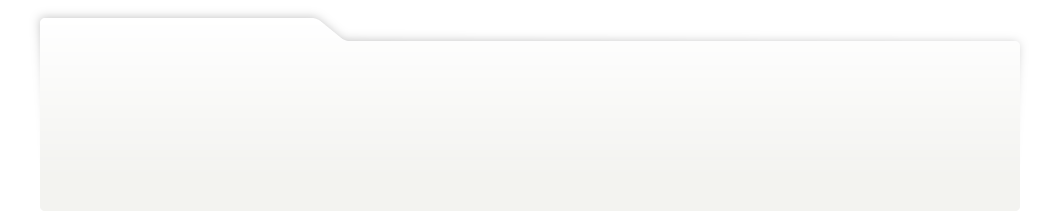
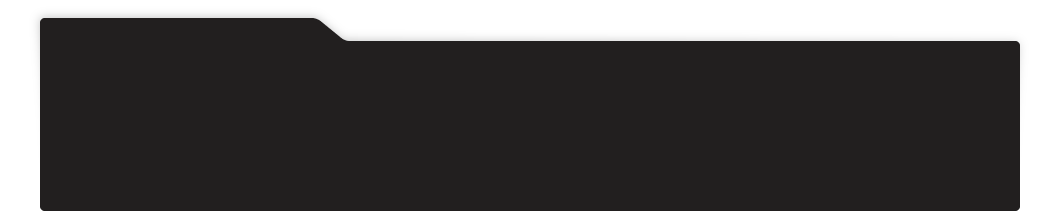
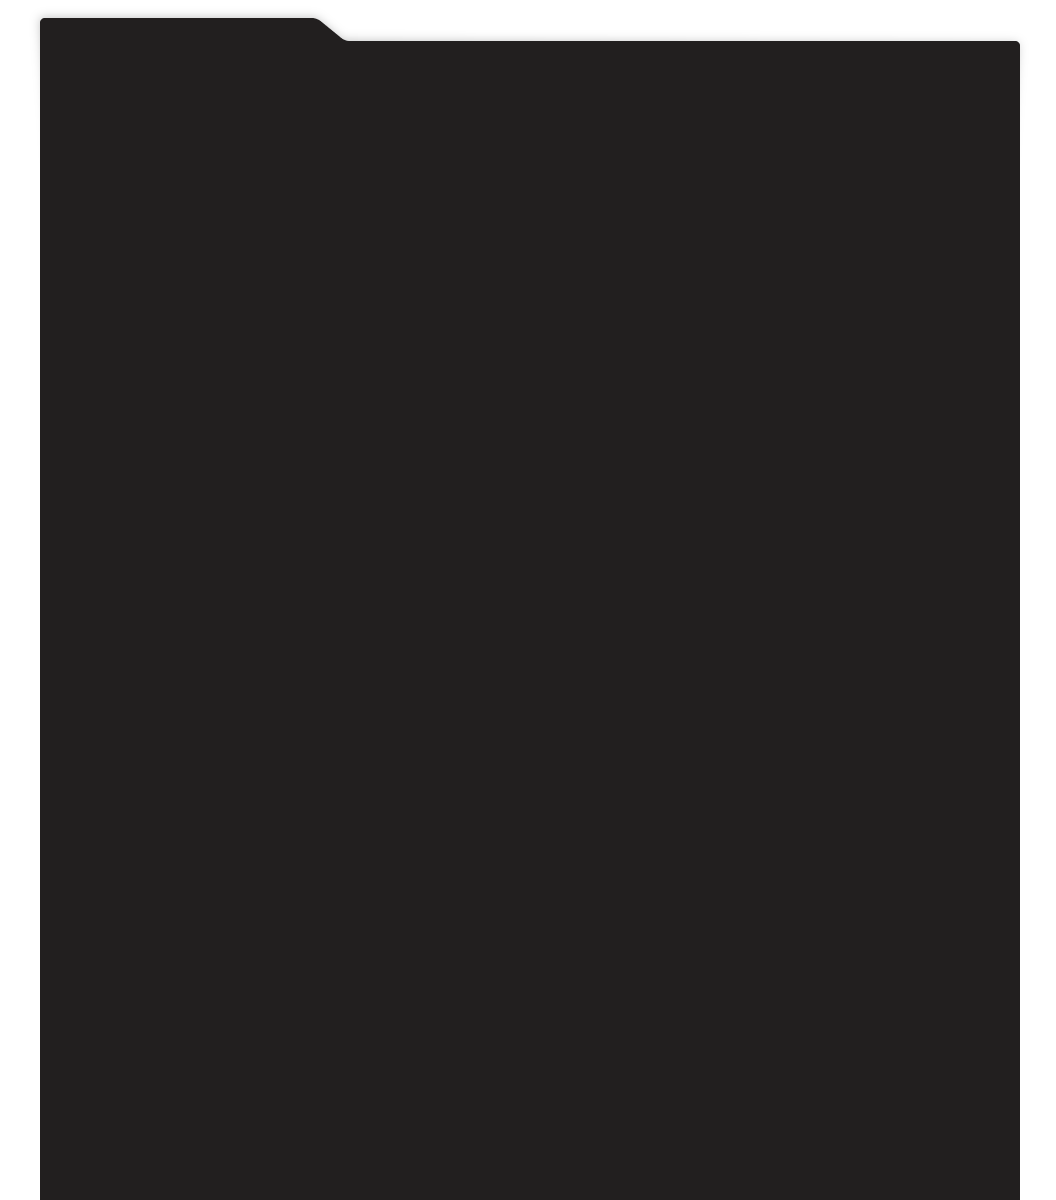
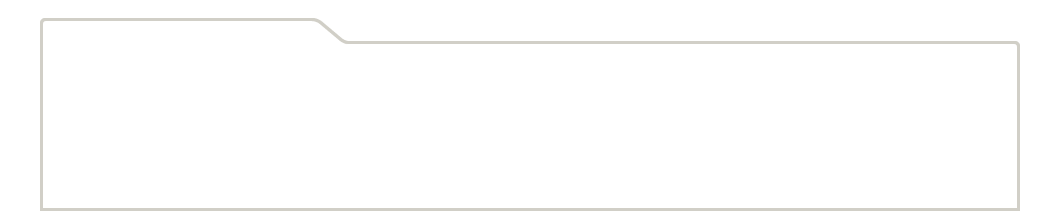
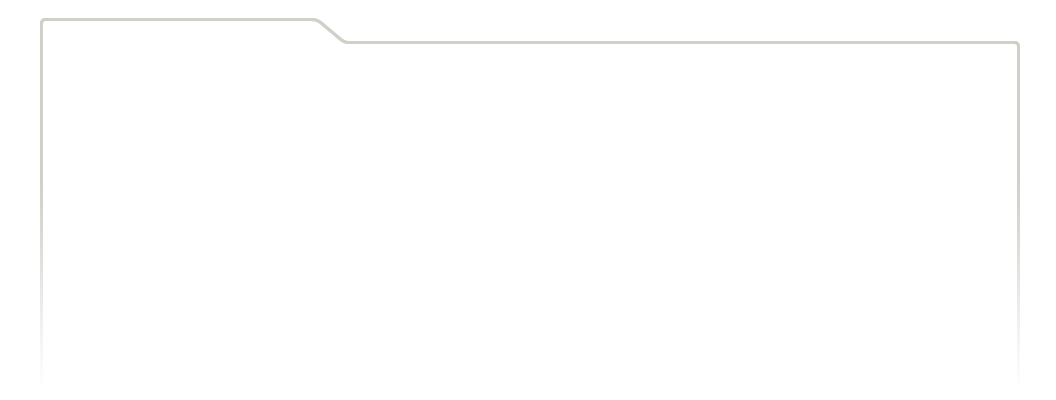
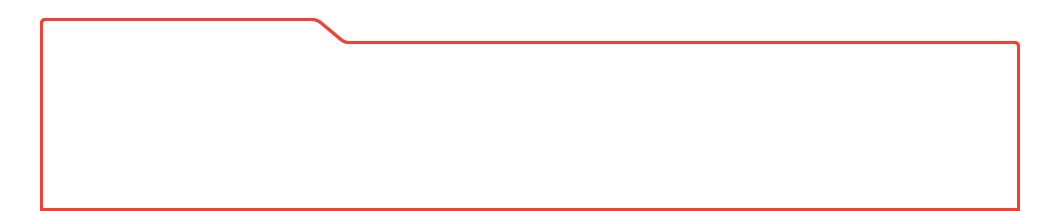
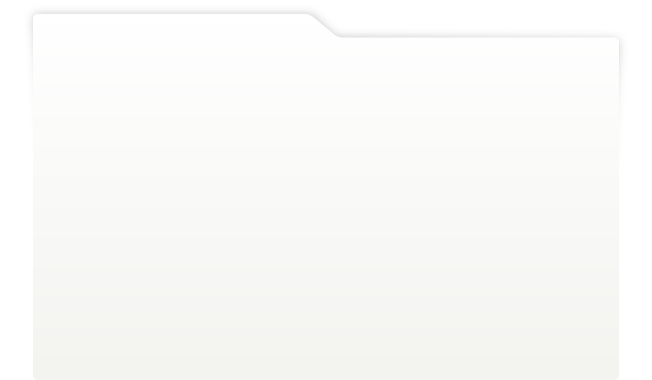
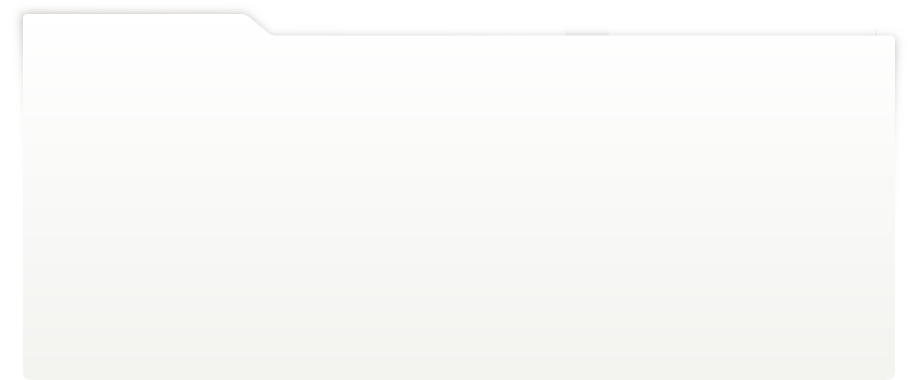
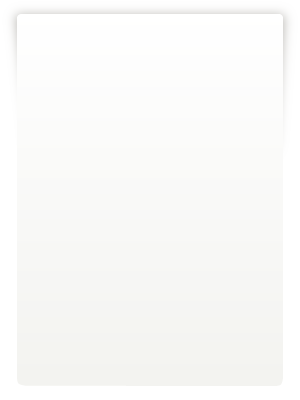
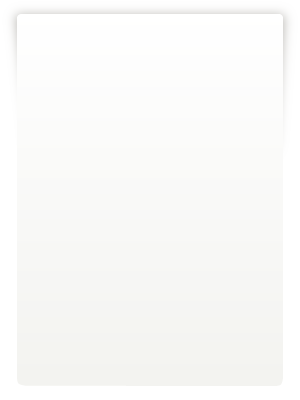
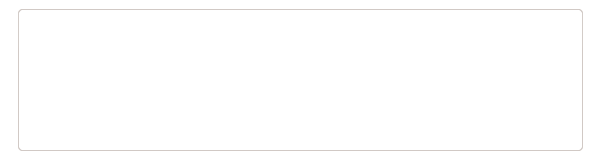
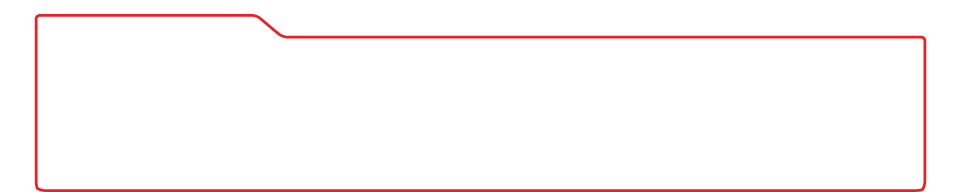
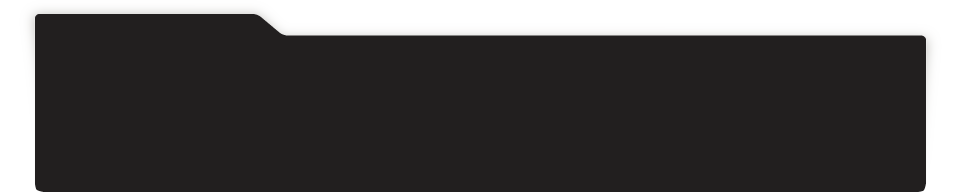
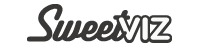
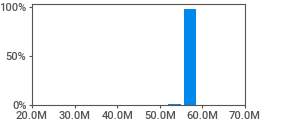
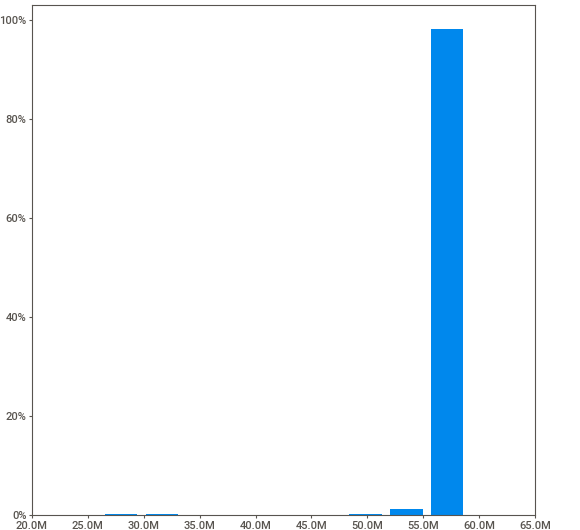
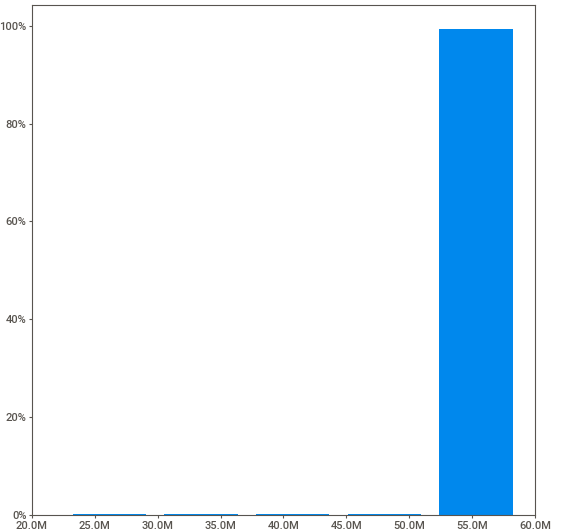
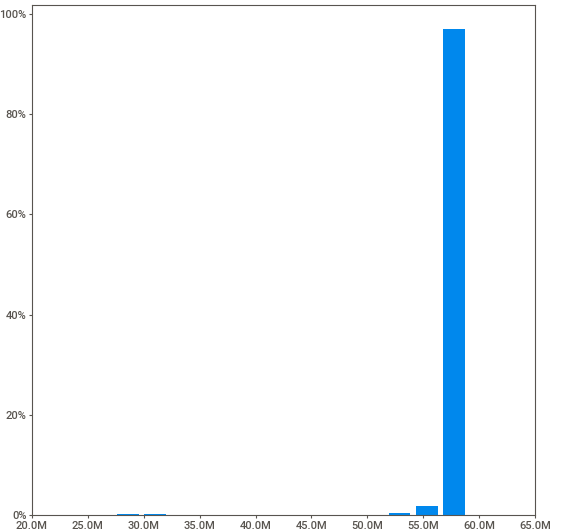
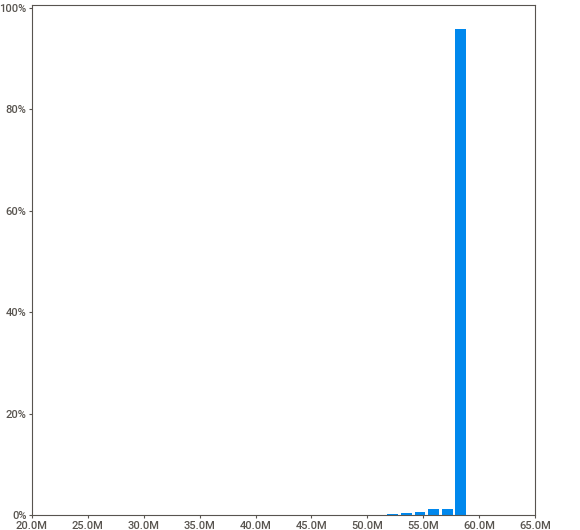
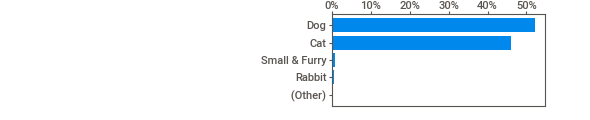
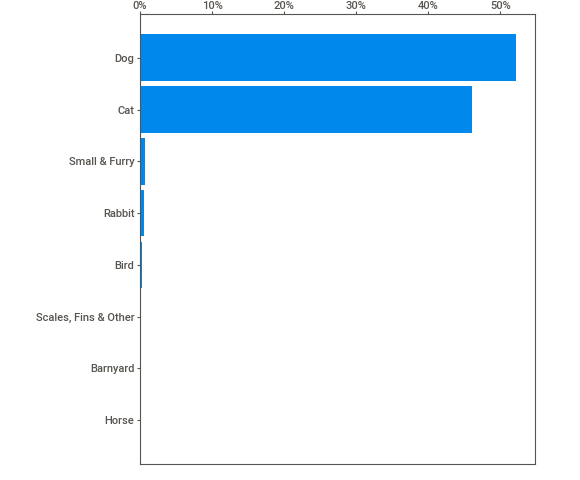
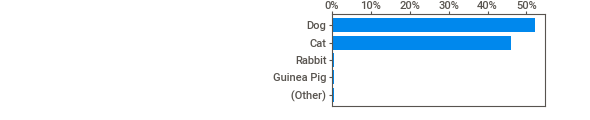
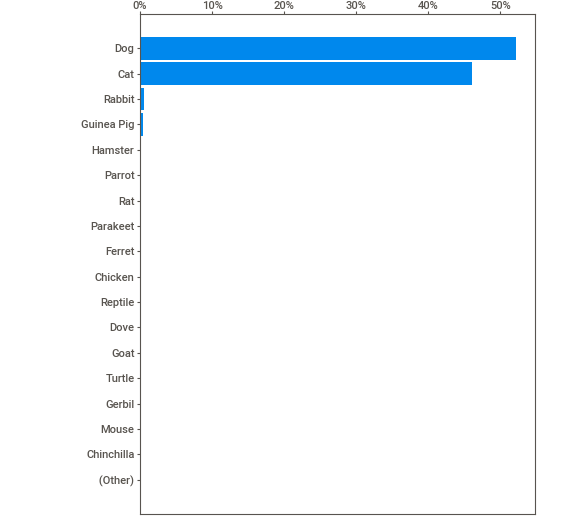
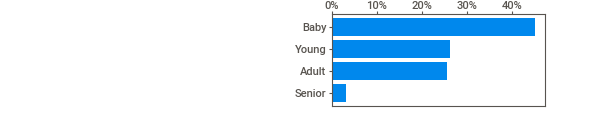
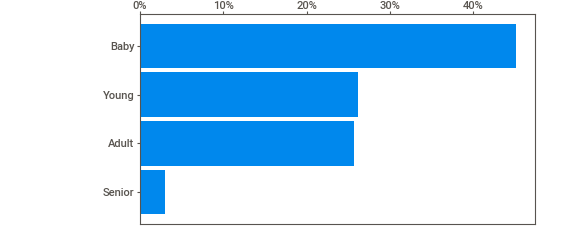
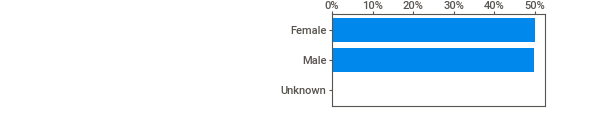
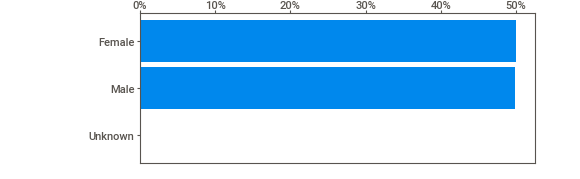
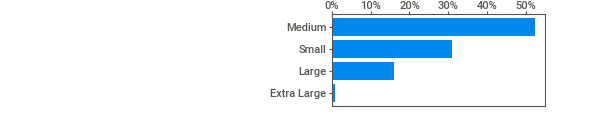
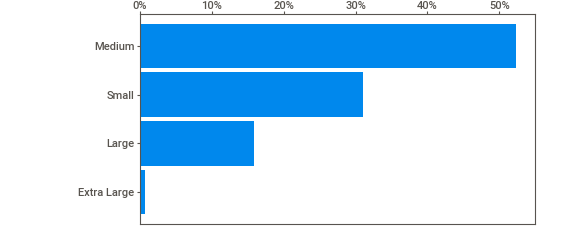
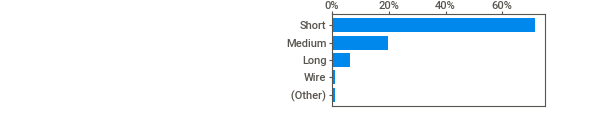
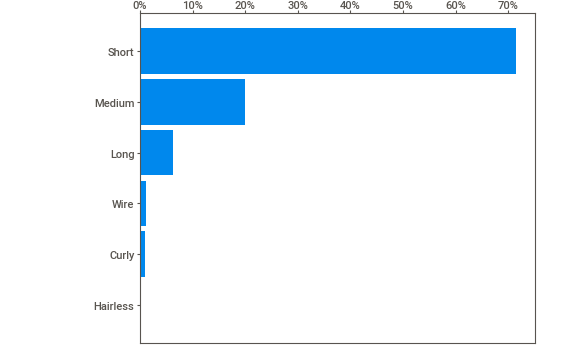
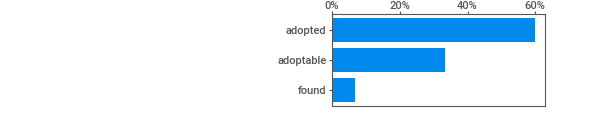
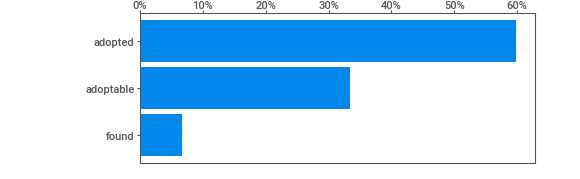
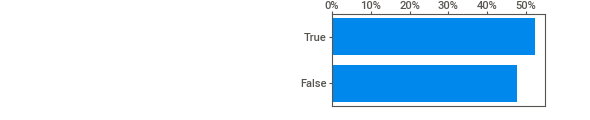
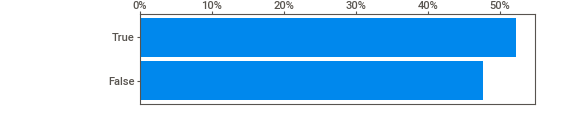
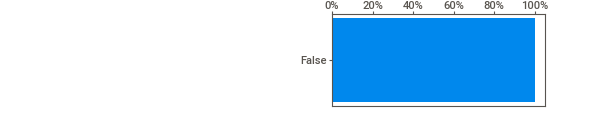
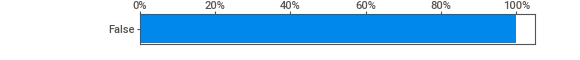
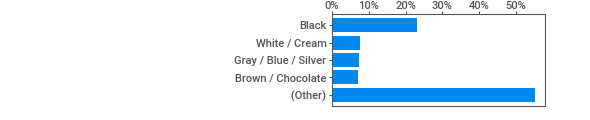
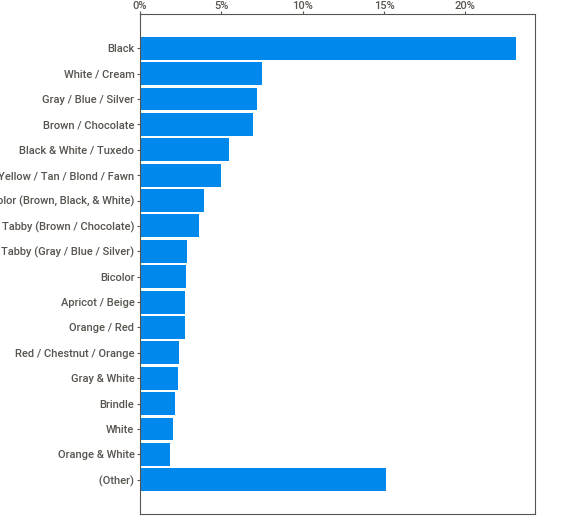
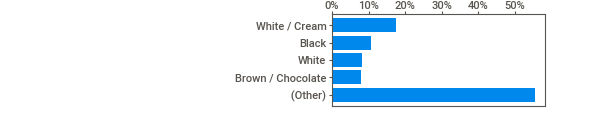
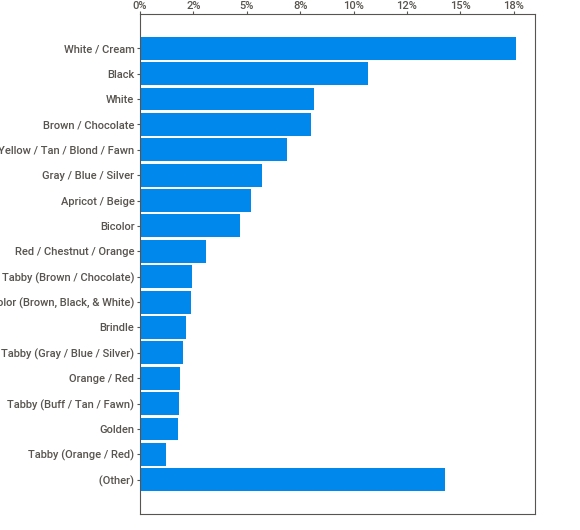
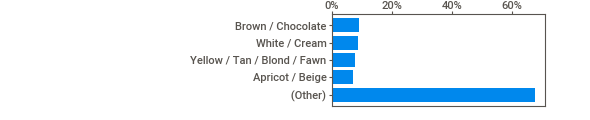
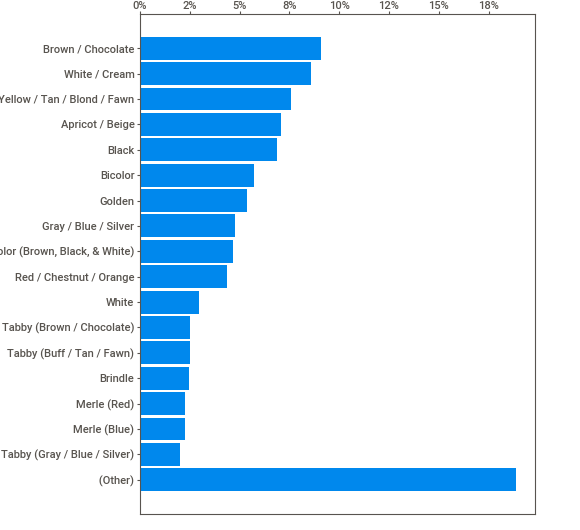
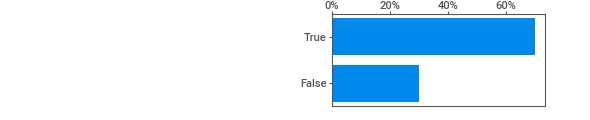
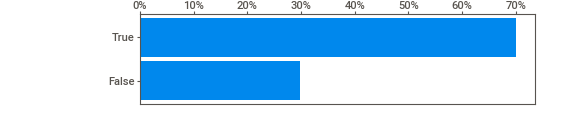
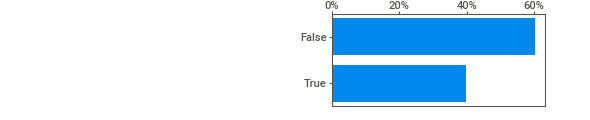
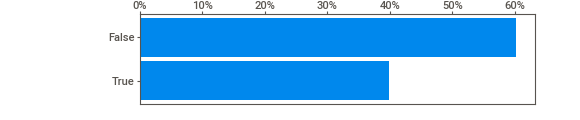
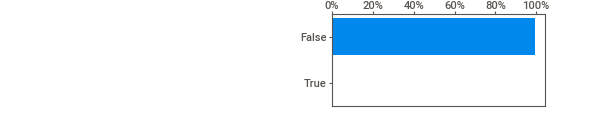
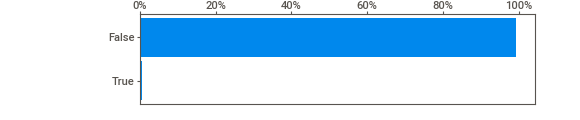
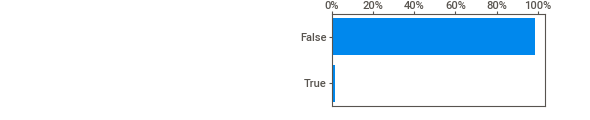
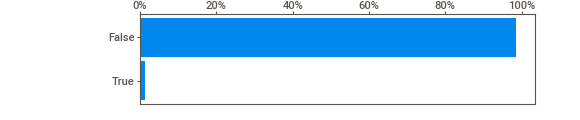
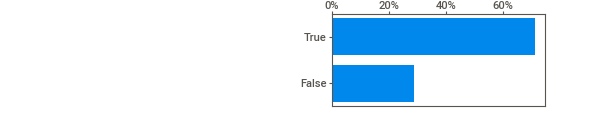
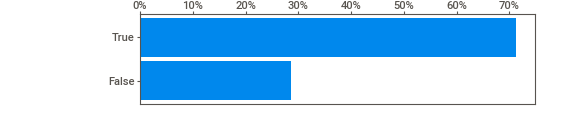
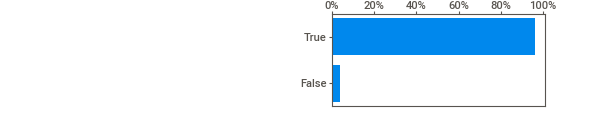
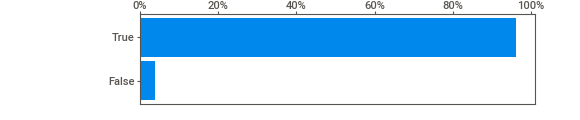
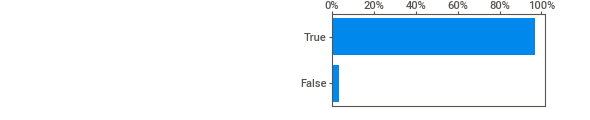
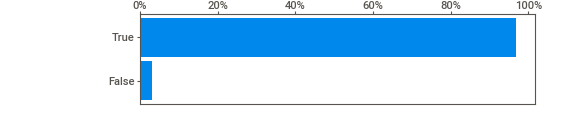
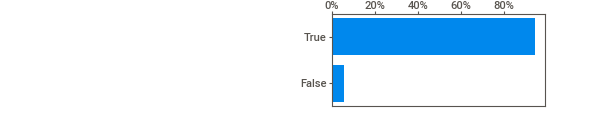
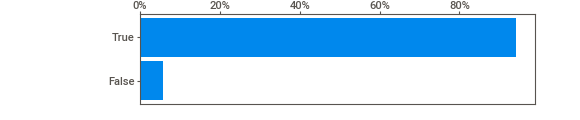
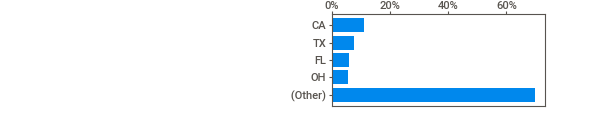
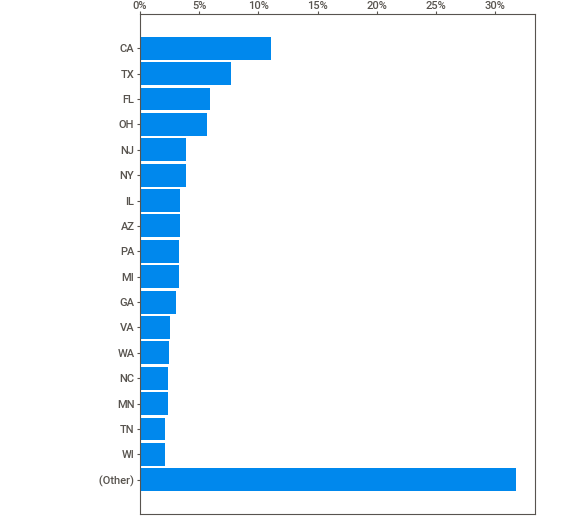
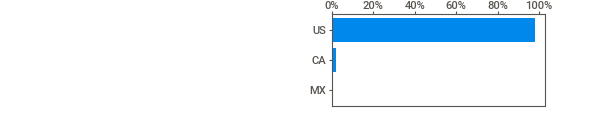
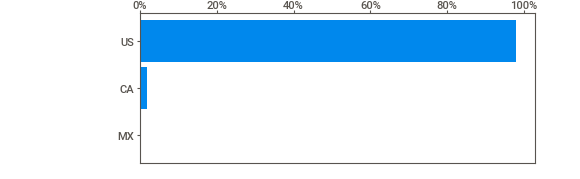
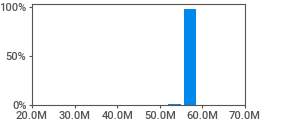
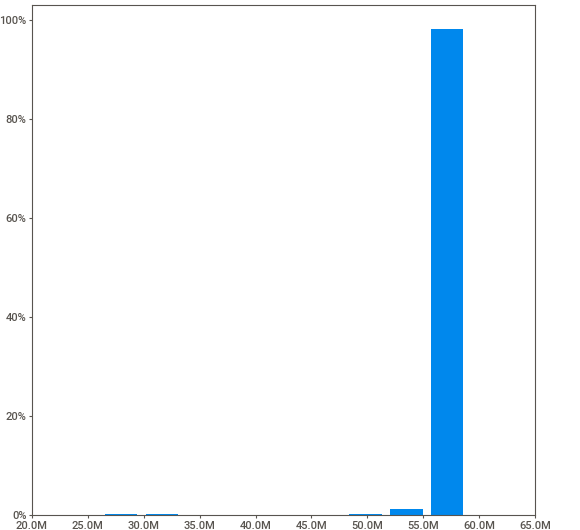
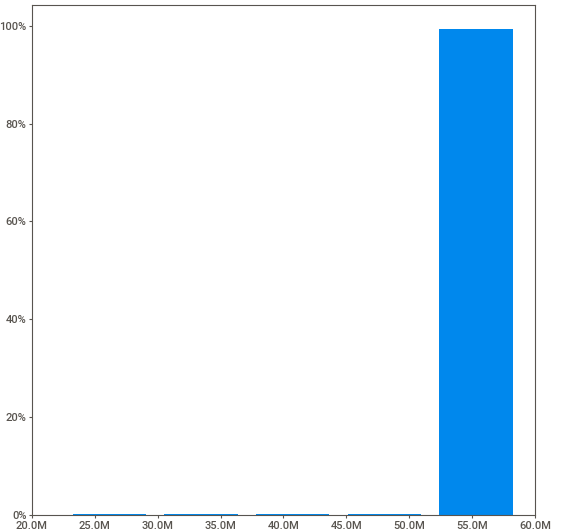
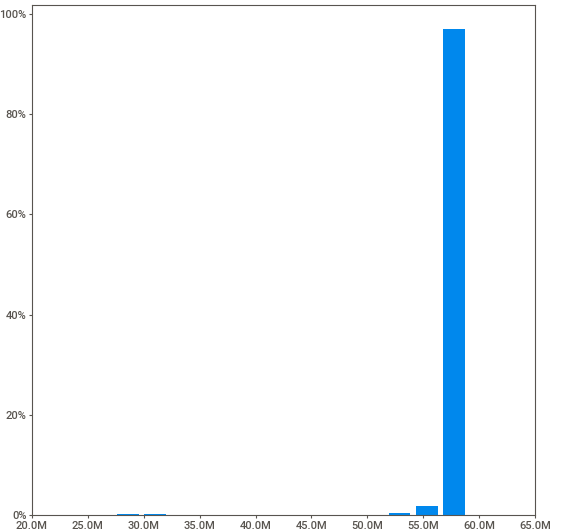
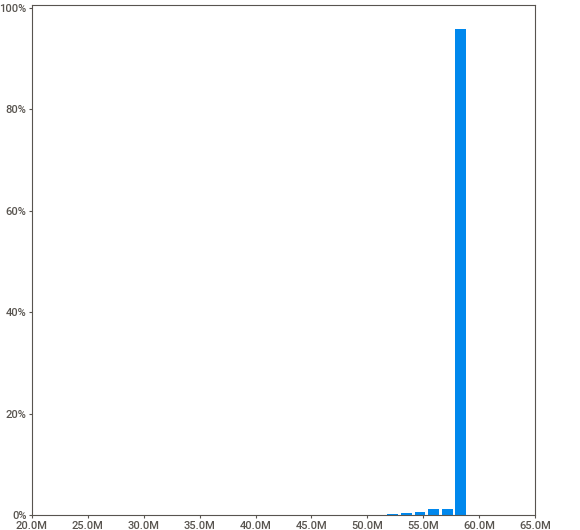
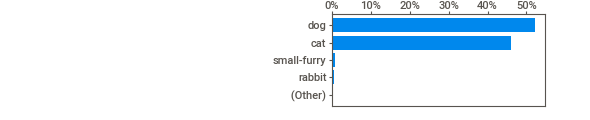
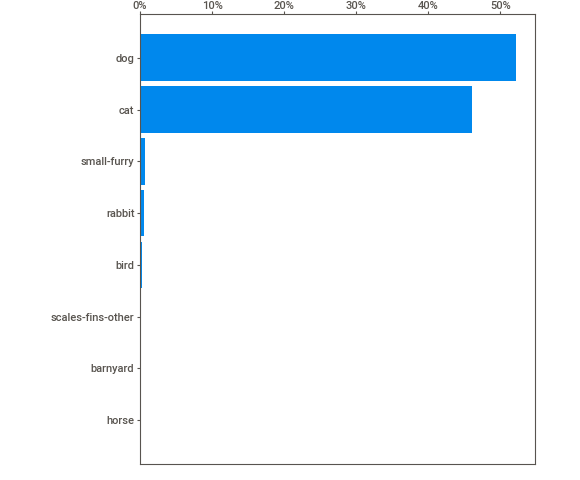
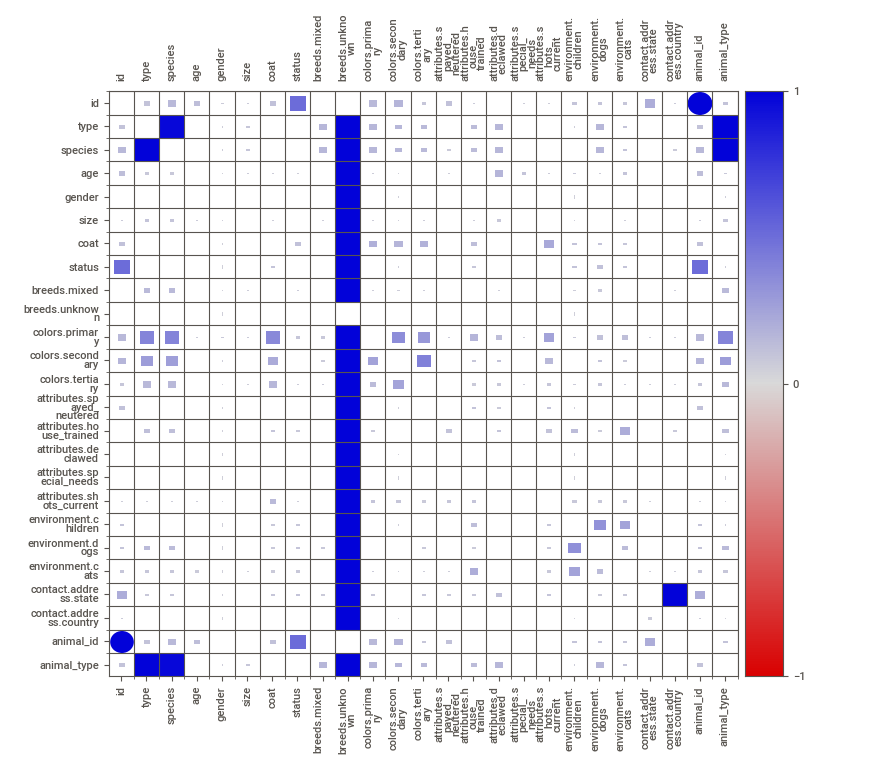
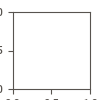

In [18]:
import sweetviz as sv

orig_data_report = sv.analyze(fullFrameNoDups)
orig_data_report.show_notebook()

In [19]:
orig_data_report.show_html() #save to html document

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Initial EDA findings from SweetViz <a id='sweetviz_findings'></a>

*EDA run on Data Version 0.1, which removes lists from dataset so SweetViz can analyze the rest of the columns*

**General DataSet Findings:**
- Total dataset size of 59,800 records as of EDA so far
- Columns are categorical or text based with the exception of dates, ID fields, and a 'distance' column if the user provides an address to reference from in the filter options.
- Dataset provides 23 categorical columns, 22 text columns, 2 numerical columns, and 3 columns that are lists (photos, videos, and tags). 
- Of the list columns: 'photos' only has 6% missing values (based on columns which had the same info but single photo links), but 'video' and 'tags' seem to be rarely filled in based on manual inspection. 
- 3 columns are copies of existing columns and would be removed (animal_id, animal_type, and organization_id.1)
- Columns that have high amounts missing values:  'coat', 'organization_animal_id', 'breeds.secondary', 'colors.primary', 'colors.secondary', 'colors.tertiary', 'attributes.declawed', 'environment.children', 'environment.dogs', 'environment.cats', 'contact.address.address1', 'contact.address.address1', and 'primary_photo_cropped'.
- Of the columns with missing values: 'coat', 'colors.primary', 'attributes.declawed', 'environment.children', 'environment.dogs', 'environment.cats', 'contact.address.address1', and 'contact.address.address1' might be of concern but is not a show stopper.
- Dataset provides plenty of context columns that would be returned to a potential user upon a match but not used for training or testing the model
- Dataset has 197 duplicates, will need to see if those are returned animals or in error
- Dataset features are not correlated with each other unless they identical columns that have the same data but different columns names (3 of them mentioned above). Only exception is the 'breeds.unknown' columns which only has 'False' for all animals. This column can safely be dropped. 
- Dataset does not include user ratings(Y), so those would have to be generated as the users use the system and the system would need a cold start.
- Dataset does not tag organizations as 'kill' or 'no-kill shelters'. This would need to be manually added to the dataset.

**Specific DataSet Column Findings of note:**
- 'ID' seems to be a unique identifier per animal in the system.
- Dogs and Cats make up 98% of the records that were obtained so far. App should only cover dogs and cats.
- 'species' and 'type' are different. 'species' is more fine-grained in its categories than 'type'.
- 71% of animals in the system are categorized as 'baby' or 'young', rather than older dogs. Why are 'baby' dogs so numerous? 
- There is no gender preference in the animals.
- 83% of animals are categorized as 'small' or 'medium' sized.
- 'coat' column is missing a lot of data and best we might be able to do it fill in gaps with general assumptions via say AKC breed information. Would be manual work. 
- 'description' column is freeform text that potentially holds useful information but would require NLP to parse it automatically.
- 'status' column lets us filter to adoptable pets only.
- 'distance' from user to matched pets is possible with API.
- For 'breeds.primary' *Mixed Breeds* do not dominate the dataset (only 4%). Rather *Domestic Short hair* (common cat) have the most at 30%. How distinct are the cats??
- 48% of the animals are labeled as NOT mixed breed. Breed generic information would be useful for those listed a single breed. 
- 'breeds.unknown' is False for all animals and can be dropped. 
- Colors data has a lot of missing values and might not be usable for training
- Only 46% of 'attributes.declawed' are filled out, which equals the % of cats in the systems. We can fill in the dogs missing values as 'NA'. 
- Attributes fields seem very useful and have very little missing data, which is great.
- Environment fields have a lot of missing data which is unfortunate, since this will probably be a key field. We will probably have to fill in missing values with something just so we can use what we have rather than use nothing. Knowing what an animal is okay with environment-wise is very good to know.
- Dataset includes plenty of photos with only 6% missing values, which will be great for the app. 
- Contact email, followed by contact phone, is most reliable for output to user once they are matched.

# Follow-up Questions <a id='followup'></a>

- Data Version   0: fullFrame (saved)
- Data Version 0.1: fullFrameNoDups (only used internally within workbook)

When looking at analyzes below, you can tell which version of the data was used by the dataframe name. For clarity, all Follow-up questions use Data Version 0.

### How many missing values for list columns <a id='missingValues'></a>

In [29]:
pd.set_option('display.max_columns', 500)
fullFrame.head(3) # display so we can see what 'missing' means for the 3 columns of note: tags, videos, and photos.

id organization_id  \
0  58965809            ND04   
1  58965808            ND04   
2  58965806            ND04   

                                                 url type species    age  \
0  https://www.petfinder.com/cat/magnolia-5896580...  Cat     Cat  Adult   
1  https://www.petfinder.com/cat/vienna-58965808/...  Cat     Cat   Baby   
2  https://www.petfinder.com/cat/new-gray-cat-589...  Cat     Cat   Baby   

   gender    size coat tags          name description organization_animal_id  \
0  Female  Medium  NaN   []      Magnolia           .               22-10411   
1  Female   Small  NaN   []        Vienna           .               22-10412   
2    Male  Medium  NaN   []  NEW-Gray cat           .               22-10413   

                                              photos videos status  \
0  [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...     []  found   
1  [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...     []  found   
2  [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...     []  found   

          status_changed_at              published_at  distance  \
0  2022-11-26T00:33:44+0000  2022-11-26T00:33:42+0000       NaN   
1  2022-11-26T00:33:44+0000  2022-11-26T00:33:42+0000       NaN   
2  2022-11-26T00:33:43+0000  2022-11-26T00:33:41+0000       NaN   

         breeds.primary breeds.secondary  breeds.mixed  breeds.unknown  \
0   Domestic Short Hair              NaN         False           False   
1  Domestic Medium Hair              NaN         False           False   
2   Domestic Short Hair              NaN         False           False   

  colors.primary colors.secondary colors.tertiary  attributes.spayed_neutered  \
0            NaN              NaN             NaN                       False   
1            NaN              NaN             NaN                       False   
2            NaN              NaN             NaN                       False   

   attributes.house_trained attributes.declawed  attributes.special_needs  \
0                     False               False                     False   
1                     False               False                     False   
2                     False               False                     False   

   attributes.shots_current environment.children environment.dogs  \
0                      True                  NaN              NaN   
1                      True                  NaN              NaN   
2                     False                  NaN              NaN   

  environment.cats                        primary_photo_cropped.small  \
0              NaN  https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...   
1              NaN  https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...   
2              NaN  https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...   

                        primary_photo_cropped.medium  \
0  https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...   
1  https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...   
2  https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...   

                         primary_photo_cropped.large  \
0  https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...   
1  https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...   
2  https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...   

                          primary_photo_cropped.full      contact.email  \
0  https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...  adopt@cofpets.com   
1  https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...  adopt@cofpets.com   
2  https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...  adopt@cofpets.com   

    contact.phone contact.address.address1 contact.address.address2  \
0  (701) 775-3732   1726 S. Washington St.                      NaN   
1  (701) 775-3732   1726 S. Washington St.                      NaN   
2  (701) 775-3732   1726 S. Washington St.                      NaN   

  contact.address.city contact.address.state contact.address.postcode  \
0          Grand Forks                    ND                    58203   
1          Grand Forks   

In [39]:
valueCounts = fullFrame['videos'].value_counts() # check videos columns for missing values aka []
print((valueCounts["[]"]/fullFrame.shape[0])*100,"% animals missing videos") # only interested in missing values

97.58193979933111 % animals missing videos


In [40]:
valueCounts = fullFrame['tags'].value_counts() # check videos columns for missing values aka []
print((valueCounts["[]"]/fullFrame.shape[0])*100,"% animals missing tags") # only interested in missing values

65.43311036789298 % animals missing tags


In [41]:
valueCounts = fullFrame['photos'].value_counts() # check videos columns for missing values aka []
print((valueCounts["[]"]/fullFrame.shape[0])*100,"% animals missing photos") # only interested in missing values

6.287625418060201 % animals missing photos


**List Column Missing Values Findings**
1. 'photos' missing value count matches SweetViz Auto EDA of 6% => Single picture columns can replace this list column.
2. 'videos' missing value count is huge. App should just stick to showing photos.
3. 'tags' missing valueu count is 65% and often no standardization for comments. Should not be using for training. At best, can be outputed to user when matched to animal. 

### Animal type impact on missing values <a id='byAnimalmissingValues'></a>

In [42]:
pd.set_option('display.max_columns', 500)
fullFrame.head(3) # display so we can see what 'missing' means, looks like we can just use an NaN check

id organization_id  \
0  58965809            ND04   
1  58965808            ND04   
2  58965806            ND04   

                                                 url type species    age  \
0  https://www.petfinder.com/cat/magnolia-5896580...  Cat     Cat  Adult   
1  https://www.petfinder.com/cat/vienna-58965808/...  Cat     Cat   Baby   
2  https://www.petfinder.com/cat/new-gray-cat-589...  Cat     Cat   Baby   

   gender    size coat tags          name description organization_animal_id  \
0  Female  Medium  NaN   []      Magnolia           .               22-10411   
1  Female   Small  NaN   []        Vienna           .               22-10412   
2    Male  Medium  NaN   []  NEW-Gray cat           .               22-10413   

                                              photos videos status  \
0  [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...     []  found   
1  [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...     []  found   
2  [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...     []  found   

          status_changed_at              published_at  distance  \
0  2022-11-26T00:33:44+0000  2022-11-26T00:33:42+0000       NaN   
1  2022-11-26T00:33:44+0000  2022-11-26T00:33:42+0000       NaN   
2  2022-11-26T00:33:43+0000  2022-11-26T00:33:41+0000       NaN   

         breeds.primary breeds.secondary  breeds.mixed  breeds.unknown  \
0   Domestic Short Hair              NaN         False           False   
1  Domestic Medium Hair              NaN         False           False   
2   Domestic Short Hair              NaN         False           False   

  colors.primary colors.secondary colors.tertiary  attributes.spayed_neutered  \
0            NaN              NaN             NaN                       False   
1            NaN              NaN             NaN                       False   
2            NaN              NaN             NaN                       False   

   attributes.house_trained attributes.declawed  attributes.special_needs  \
0                     False               False                     False   
1                     False               False                     False   
2                     False               False                     False   

   attributes.shots_current environment.children environment.dogs  \
0                      True                  NaN              NaN   
1                      True                  NaN              NaN   
2                     False                  NaN              NaN   

  environment.cats                        primary_photo_cropped.small  \
0              NaN  https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...   
1              NaN  https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...   
2              NaN  https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...   

                        primary_photo_cropped.medium  \
0  https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...   
1  https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...   
2  https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...   

                         primary_photo_cropped.large  \
0  https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...   
1  https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...   
2  https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...   

                          primary_photo_cropped.full      contact.email  \
0  https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...  adopt@cofpets.com   
1  https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...  adopt@cofpets.com   
2  https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...  adopt@cofpets.com   

    contact.phone contact.address.address1 contact.address.address2  \
0  (701) 775-3732   1726 S. Washington St.                      NaN   
1  (701) 775-3732   1726 S. Washington St.                      NaN   
2  (701) 775-3732   1726 S. Washington St.                      NaN   

  contact.address.city contact.address.state contact.address.postcode  \
0          Grand Forks                    ND                    58203   
1          Grand Forks   

In [43]:
missingValuesCols = ['coat', 'organization_animal_id', 'breeds.secondary', 'colors.primary',
                     'colors.secondary', 'colors.tertiary', 'attributes.declawed',
                     'environment.children', 'environment.dogs', 'environment.cats',
                     'contact.address.address1', 'contact.address.address1','primary_photo_cropped']

In [99]:
valueCounts = fullFrame.set_index('type').isna().groupby(level=0).sum()/fullFrame.shape[0] # level=0 refers to our index, which we made 'type'


In [100]:
pd.set_option('display.max_columns', 500)
valueCounts # show percentage of values NA for all columns in the dataset

id  organization_id  url  species  age  gender  size  \
type                                                                          
Barnyard              0.0              0.0  0.0      0.0  0.0     0.0   0.0   
Bird                  0.0              0.0  0.0      0.0  0.0     0.0   0.0   
Cat                   0.0              0.0  0.0      0.0  0.0     0.0   0.0   
Dog                   0.0              0.0  0.0      0.0  0.0     0.0   0.0   
Horse                 0.0              0.0  0.0      0.0  0.0     0.0   0.0   
Rabbit                0.0              0.0  0.0      0.0  0.0     0.0   0.0   
Scales, Fins & Other  0.0              0.0  0.0      0.0  0.0     0.0   0.0   
Small & Furry         0.0              0.0  0.0      0.0  0.0     0.0   0.0   

                          coat  tags      name  description  \
type                                                          
Barnyard              0.000435   0.0  0.000000     0.000318   
Bird                  0.002258   0.0  0.000000     0.000569   
Cat                   0.251505   0.0  0.000017     0.094983   
Dog                   0.271739   0.0  0.000000     0.089164   
Horse                 0.000117   0.0  0.000000     0.000000   
Rabbit                0.003997   0.0  0.000000     0.001823   
Scales, Fins & Other  0.000819   0.0  0.000000     0.000201   
Small & Furry         0.005368   0.0  0.000000     0.002441   

                      organization_animal_id  photos  videos  status  \
type                                                                   
Barnyard                            0.000067     0.0     0.0     0.0   
Bird                                0.000786     0.0     0.0     0.0   
Cat                                 0.177308     0.0     0.0     0.0   
Dog                                 0.233562     0.0     0.0     0.0   
Horse                               0.000067     0.0     0.0     0.0   
Rabbit                              0.002224     0.0     0.0     0.0   
Scales, Fins & Other                0.000385     0.0     0.0     0.0   
Small & Furry                       0.002542     0.0     0.0     0.0   

                      status_changed_at  published_at  distance  \
type                                                              
Barnyard                            0.0           0.0  0.000468   
Bird                                0.0           0.0  0.002258   
Cat                                 0.0           0.0  0.460836   
Dog                                 0.0           0.0  0.521773   
Horse                               0.0           0.0  0.000117   
Rabbit                              0.0           0.0  0.006221   
Scales, Fins & Other                0.0           0.0  0.000819   
Small & Furry                       0.0           0.0  0.007508   

                      breeds.primary  breeds.secondary  breeds.mixed  \
type                                                                   
Barnyard                         0.0          0.000452           0.0   
Bird                             0.0          0.002258           0.0   
Cat                              0.0          0.404615           0.0   
Dog                              0.0          0.342157           0.0   
Horse                            0.0          0.000117           0.0   
Rabbit                           0.0          0.005719           0.0   
Scales, Fins & Other             0.0          0.000803           0.0   
Small & Furry                    0.0          0.007391           0.0   

                      breeds.unknown  colors.primary  colors.secondary  \
type                                                                     
Barnyard                         0.0        0.000418          0.000468   
Bird                             0.0        0.001589          0.001722   
Cat                              0.0        0.171773          0.350067   
Dog                              0.0        0.226739          0.317308   
Horse                            0.0        

In [101]:
valueCounts[missingValuesCols] # show percentage of values NA for only columns we already know have high missing value rate

coat  organization_animal_id  breeds.secondary  \
type                                                                       
Barnyard              0.000435                0.000067          0.000452   
Bird                  0.002258                0.000786          0.002258   
Cat                   0.251505                0.177308          0.404615   
Dog                   0.271739                0.233562          0.342157   
Horse                 0.000117                0.000067          0.000117   
Rabbit                0.003997                0.002224          0.005719   
Scales, Fins & Other  0.000819                0.000385          0.000803   
Small & Furry         0.005368                0.002542          0.007391   

                      colors.primary  colors.secondary  colors.tertiary  \
type                                                                      
Barnyard                    0.000418          0.000468         0.000468   
Bird                        0.001589          0.001722         0.002040   
Cat                         0.171773          0.350067         0.416722   
Dog                         0.226739          0.317308         0.426572   
Horse                       0.000033          0.000100         0.000117   
Rabbit                      0.003963          0.005100         0.006087   
Scales, Fins & Other        0.000635          0.000753         0.000819   
Small & Furry               0.005217          0.006321         0.007124   

                      attributes.declawed  environment.children  \
type                                                              
Barnyard                         0.000468              0.000452   
Bird                             0.002258              0.002107   
Cat                              0.000000              0.310452   
Dog                              0.521773              0.299916   
Horse                            0.000117              0.000100   
Rabbit                           0.006221              0.005468   
Scales, Fins & Other             0.000819              0.000635   
Small & Furry                    0.007508              0.006421   

                      environment.dogs  environment.cats  \
type                                                       
Barnyard                      0.000452          0.000452   
Bird                          0.002090          0.002174   
Cat                           0.363729          0.239482   
Dog                           0.228512          0.384833   
Horse                         0.000100          0.000100   
Rabbit                        0.005753          0.005719   
Scales, Fins & Other          0.000702          0.000719   
Small & Furry                 0.007157          0.007224   

                      contact.address.address1  contact.address.address1  \
type                                                                       
Barnyard                              0.000184                  0.000184   
Bird                                  0.000870                  0.000870   
Cat                                   0.167207                  0.167207   
Dog                                   0.226538                  0.226538   
Horse                                 0.000067                  0.000067   
Rabbit                                0.002492                  0.002492   
Scales, Fins & Other                  0.000418                  0.000418   
Small & Furry                         0.002241                  0.002241   

                      primary_photo_cropped  
type                                         
Barnyard                           0.000468  
Bird                               0.002258  
Cat                                0.460836  
Dog                                0.521773  
Horse                              0.000117  
Rabbit                             0.006221  
Scales, Fins & Other               0.000819  
Small & Furry                      0.007508

In [102]:
valueCounts = fullFrame.set_index('type').notna().groupby(level=0).sum()/fullFrame.shape[0] # level=0 refers to our index, which we made 'type'

In [103]:
valueCounts # show percentage of values not NA for all columns in the dataset

id  organization_id       url   species       age  \
type                                                                            
Barnyard              0.000468         0.000468  0.000468  0.000468  0.000468   
Bird                  0.002258         0.002258  0.002258  0.002258  0.002258   
Cat                   0.460836         0.460836  0.460836  0.460836  0.460836   
Dog                   0.521773         0.521773  0.521773  0.521773  0.521773   
Horse                 0.000117         0.000117  0.000117  0.000117  0.000117   
Rabbit                0.006221         0.006221  0.006221  0.006221  0.006221   
Scales, Fins & Other  0.000819         0.000819  0.000819  0.000819  0.000819   
Small & Furry         0.007508         0.007508  0.007508  0.007508  0.007508   

                        gender      size      coat      tags      name  \
type                                                                     
Barnyard              0.000468  0.000468  0.000033  0.000468  0.000468   
Bird                  0.002258  0.002258  0.000000  0.002258  0.002258   
Cat                   0.460836  0.460836  0.209331  0.460836  0.460819   
Dog                   0.521773  0.521773  0.250033  0.521773  0.521773   
Horse                 0.000117  0.000117  0.000000  0.000117  0.000117   
Rabbit                0.006221  0.006221  0.002224  0.006221  0.006221   
Scales, Fins & Other  0.000819  0.000819  0.000000  0.000819  0.000819   
Small & Furry         0.007508  0.007508  0.002140  0.007508  0.007508   

                      description  organization_animal_id    photos    videos  \
type                                                                            
Barnyard                 0.000151                0.000401  0.000468  0.000468   
Bird                     0.001689                0.001472  0.002258  0.002258   
Cat                      0.365853                0.283528  0.460836  0.460836   
Dog                      0.432609                0.288211  0.521773  0.521773   
Horse                    0.000117                0.000050  0.000117  0.000117   
Rabbit                   0.004398                0.003997  0.006221  0.006221   
Scales, Fins & Other     0.000619                0.000435  0.000819  0.000819   
Small & Furry            0.005067                0.004967  0.007508  0.007508   

                        status  status_changed_at  published_at  distance  \
type                                                                        
Barnyard              0.000468           0.000468      0.000468       0.0   
Bird                  0.002258           0.002258      0.002258       0.0   
Cat                   0.460836           0.460836      0.460836       0.0   
Dog                   0.521773           0.521773      0.521773       0.0   
Horse                 0.000117           0.000117      0.000117       0.0   
Rabbit                0.006221           0.006221      0.006221       0.0   
Scales, Fins & Other  0.000819           0.000819      0.000819       0.0   
Small & Furry         0.007508           0.007508      0.007508       0.0   

                      breeds.primary  breeds.secondary  breeds.mixed  \
type                                                                   
Barnyard                    0.000468          0.000017      0.000468   
Bird                        0.002258          0.000000      0.002258   
Cat                         0.460836          0.056221      0.460836   
Dog                         0.521773          0.179615      0.521773   
Horse                       0.000117          0.000000      0.000117   
Rabbit                      0.006221          0.000502      0.006221   
Scales, Fins & Other        0.000819          0.000017      0.000819   
Small & Furry               0.007508          0.000117      0.007508   

                      breeds.unknown  colors.primary  colors.secondary  \
type                                                                     
Barnyard                 

In [104]:
valueCounts[missingValuesCols] # show percentage of values not NA for only columns we already know have high missing value rate

coat  organization_animal_id  breeds.secondary  \
type                                                                       
Barnyard              0.000033                0.000401          0.000017   
Bird                  0.000000                0.001472          0.000000   
Cat                   0.209331                0.283528          0.056221   
Dog                   0.250033                0.288211          0.179615   
Horse                 0.000000                0.000050          0.000000   
Rabbit                0.002224                0.003997          0.000502   
Scales, Fins & Other  0.000000                0.000435          0.000017   
Small & Furry         0.002140                0.004967          0.000117   

                      colors.primary  colors.secondary  colors.tertiary  \
type                                                                      
Barnyard                    0.000050          0.000000         0.000000   
Bird                        0.000669          0.000535         0.000217   
Cat                         0.289064          0.110769         0.044114   
Dog                         0.295033          0.204465         0.095201   
Horse                       0.000084          0.000017         0.000000   
Rabbit                      0.002258          0.001120         0.000134   
Scales, Fins & Other        0.000184          0.000067         0.000000   
Small & Furry               0.002291          0.001187         0.000385   

                      attributes.declawed  environment.children  \
type                                                              
Barnyard                         0.000000              0.000017   
Bird                             0.000000              0.000151   
Cat                              0.460836              0.150385   
Dog                              0.000000              0.221856   
Horse                            0.000000              0.000017   
Rabbit                           0.000000              0.000753   
Scales, Fins & Other             0.000000              0.000184   
Small & Furry                    0.000000              0.001087   

                      environment.dogs  environment.cats  \
type                                                       
Barnyard                      0.000017          0.000017   
Bird                          0.000167          0.000084   
Cat                           0.097107          0.221355   
Dog                           0.293261          0.136940   
Horse                         0.000017          0.000017   
Rabbit                        0.000468          0.000502   
Scales, Fins & Other          0.000117          0.000100   
Small & Furry                 0.000351          0.000284   

                      contact.address.address1  contact.address.address1  \
type                                                                       
Barnyard                              0.000284                  0.000284   
Bird                                  0.001388                  0.001388   
Cat                                   0.293629                  0.293629   
Dog                                   0.295234                  0.295234   
Horse                                 0.000050                  0.000050   
Rabbit                                0.003729                  0.003729   
Scales, Fins & Other                  0.000401                  0.000401   
Small & Furry                         0.005268                  0.005268   

                      primary_photo_cropped  
type                                         
Barnyard                                0.0  
Bird                                    0.0  
Cat                                     0.0  
Dog                                     0.0  
Horse                                   0.0  
Rabbit                                  0.0  
Scales, Fins & Other                    0.0  
Small & Furry                           0.0

**Animal Type Impact on Missing Values Findings**
1. Cats are verified to not contribute any missing values to 'attributes.declawed', thus a useful feature for cats.
2. Rest of columns have the highest NA counts for 'Cat' and 'Dog' with no advantage either way. This is probably an artifact of the dataset whose records are 98% dogs or cats. 

### Duplicate ID Check <a id='duplicateRows'></a>

In [107]:
duplicatedFullFrame = fullFrame[fullFrame.duplicated()]
duplicatedFullFrame.shape # 197 duplicate ids matches sweetviz output

(197, 50)

In [113]:
pd.set_option('display.max_columns', 500)
duplicatedFullFrame.sample(3) # on visual inspection, they don't look the same though...

id organization_id  \
22684  58720904           NJ995   
11314  58949763          CA1886   
15120  58944059           ID103   

                                                     url type species     age  \
22684  https://www.petfinder.com/dog/shaia-58720904/n...  Dog     Dog    Baby   
11314  https://www.petfinder.com/cat/winter-costa-mes...  Cat     Cat   Adult   
15120  https://www.petfinder.com/cat/ellies-58944059/...  Cat     Cat  Senior   

       gender    size coat            tags                          name  \
22684  Female   Small  NaN              []                         Shaia   
11314  Female  Medium  NaN  ['Costa Mesa']  Winter - Costa Mesa Location   
15120  Female  Medium  NaN              []                        Ellies   

                                             description  \
22684  Shaia is a part of a litter of 4 that was foun...   
11314  Winter is a gorgeous cat with the softest snow...   
15120                                                NaN   

      organization_animal_id  \
22684               18661035   
11314            PPR-A-20521   
15120               S2022556   

                                                  photos videos     status  \
22684  [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...     []    adopted   
11314  [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...     []  adoptable   
15120  [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...     []  adoptable   

              status_changed_at              published_at  distance  \
22684  2022-11-01T15:01:29+0000  2022-11-01T15:01:29+0000       NaN   
11314  2022-11-23T21:03:35+0000  2022-11-23T21:03:33+0000       NaN   
15120  2022-11-23T10:01:21+0000  2022-11-23T10:01:19+0000       NaN   

            breeds.primary breeds.secondary  breeds.mixed  breeds.unknown  \
22684   Labrador Retriever              NaN          True           False   
11314  Domestic Short Hair              NaN         False           False   
15120  Domestic Short Hair              NaN         False           False   

      colors.primary colors.secondary colors.tertiary  \
22684            NaN              NaN             NaN   
11314          White              NaN             NaN   
15120            NaN              NaN             NaN   

       attributes.spayed_neutered  attributes.house_trained  \
22684                       False                     False   
11314                        True                     False   
15120                        True                     False   

      attributes.declawed  attributes.special_needs  attributes.shots_current  \
22684                 NaN                     False                      True   
11314               False                     False                      True   
15120               False                     False                     False   

      environment.children environment.dogs environment.cats  \
22684                 True             True             True   
11314                  NaN              NaN              NaN   
15120                  NaN              NaN              NaN   

                             primary_photo_cropped.small  \
22684  https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...   
11314  https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...   
15120  https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...   

                            primary_photo_cropped.medium  \
22684  https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...   
11314  https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...   
15120  https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...   

                             primary_photo_cropped.large  \
22684  https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...   
11314  https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...   
15120  https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...   

                              primary_photo_cropped.full  \
22684  https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...   
11314  https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...  

In [136]:
dupIDs = fullFrame.groupby("id").filter(lambda x: len(x) > 1)
dupIDs.shape

(394, 50)

In [142]:
pd.set_option('display.max_rows', None)
dupIDs.sort_values('id') # appears the duplicates have same values for all cells but 197 animals appear twice and have the same time stamps


id organization_id  \
3108   54796422           GA152   
3079   54796422           GA152   
3102   54796437           GA152   
3099   54796437           GA152   
3098   54796448           GA152   
3101   54796448           GA152   
3080   54796453           GA152   
3109   54796453           GA152   
3100   54796454           GA152   
3097   54796454           GA152   
2801   55510569            NJ44   
2794   55510569            NJ44   
2795   55510575            NJ44   
2802   55510575            NJ44   
2699   55709050          FL1798   
2704   55709050          FL1798   
2602   55874680           GA299   
2597   55874680           GA299   
2601   55874737           GA299   
2596   55874737           GA299   
2600   55874742           GA299   
2595   55874742           GA299   
2199   56527284           AZ723   
2200   56527284           AZ723   
1299   58593724           AZ723   
1300   58593724           AZ723   
1201   58643223           OH248   
1198   58643223           OH248   
1197   58643227           OH248   
1200   58643227           OH248   
33901  58644717          CA2413   
33897  58644717          CA2413   
33800  58645271           TX105   
33799  58645271           TX105   
33400  58647350            NM38   
33399  58647350            NM38   
33300  58648006           TX840   
33299  58648006           TX840   
31701  58657301           MI998   
31698  58657301           MI998   
31700  58657302           MI998   
31697  58657302           MI998   
30404  58670092          OH1062   
30389  58670092          OH1062   
30405  58670093          OH1062   
30390  58670093          OH1062   
30388  58670099          OH1062   
30403  58670099          OH1062   
30401  58670100          OH1062   
30398  58670100          OH1062   
30407  58670103          OH1062   
30392  58670103          OH1062   
30391  58670104          OH1062   
30406  58670104          OH1062   
30402  58670105          OH1062   
30387  58670105          OH1062   
30393  58670106          OH1062   
30408  58670106          OH1062   
30400  58670111          OH1062   
30397  58670111          OH1062   
30201  58671701           CA129   
30194  58671701           CA129   
30196  58671702           CA129   
30203  58671702           CA129   
30202  58671703           CA129   
30199  58671703           CA129   
30197  58671715           CA129   
30204  58671715           CA129   
28801  58680620          CA2413   
28799  58680620          CA2413   
28102  58685541          FL1708   
28099  58685541          FL1708   
24900  58707444           MN330   
24899  58707444           MN330   
24706  58708461           WA650   
24698  58708461           WA650   
24707  58708470           WA650   
24699  58708470           WA650   
24396  58710256           UT218   
24400  58710256           UT218   
22697  58720767           NJ995   
22751  58720767           NJ995   
22753  58720778           NJ995   
22699  58720778           NJ995   
22752  58720783           NJ995   
22698  58720783           NJ995   
22750  58720797           NJ995   
22696  58720797           NJ995   
22749  58720803           NJ995   
22695  58720803           NJ995   
22748  58720815           NJ995   
22694  58720815           NJ995   
22625  58720844           NJ995   
22597  58720844           NJ995   
22662  58720850           NJ995   
22588  58720850           NJ995   
22659  58720853           NJ995   
22585  58720853           NJ995   
22661  58720855           NJ995   
22587  58720855           NJ995   
22656  58720860           NJ995   
22582  58720860           NJ995   
22655  58720863           NJ995   
22592  58720863           NJ995   
22657  58720870           NJ995   
22583  58720870           NJ995   
22668  58720881           NJ995   
22594  58720881           NJ995   
22648  58720888           NJ995   
22578  58720888           NJ995   
22651  58720890           NJ995   
22581  58720890           NJ995   
22649  58720896           NJ995   
22579  58720896        

In [154]:
pd.set_option('display.max_rows', 50)
dupIDsCounts = fullFrame['id'].value_counts()[fullFrame['id'].value_counts()> 1]
dupIDsCounts # 197 rows are duplicated only once! 

58949765    2
58947823    2
58739033    2
58739072    2
58966191    2
           ..
58720904    2
58670100    2
54796437    2
58720956    2
58720863    2
Name: id, Length: 197, dtype: int64

**Duplicate ID Findings**
1. There are 197 rows that are duplicated and will need deletion before making the train and test set.

### Org Names for those posting baby animals <a id='babies'></a>

In [161]:
babyPostingsOrg = fullFrame[fullFrame['age']=='Baby']
babyPostingsOrg.shape # matches sweetviz number of baby animals

(26991, 50)

In [162]:
babyPostingsOrg['type'].value_counts() # cats and dogs about equal in dominating baby animals

Cat                     15351
Dog                     11507
Small & Furry              67
Rabbit                     52
Bird                        6
Scales, Fins & Other        4
Barnyard                    4
Name: type, dtype: int64

In [164]:
babyPostingsOrg = babyPostingsOrg[babyPostingsOrg["type"].isin(["Cat","Dog"])]
babyPostingsOrg.shape

(26858, 50)

In [176]:
pd.set_option('display.max_columns', 500)
babyPostingsOrg[["id","organization_id","type","contact.email"]].sample(3)

id organization_id type                          contact.email
10956  58809376            SC38  Cat  cgumienny@CharlestonAnimalSociety.org
10421  58813917           OH110  Dog                   adopt@portageapl.org
2882   55326753           MD450  Dog                  info@caninehumane.org

**Org Names for Baby Animal Findings**
1. Cats and Dogs again dominate the 'Baby' animal findings.
2. After manual review of samples, there is no clear indication of why so many 'Baby' animals are in the database. The database does not have organization name but it does have the contact.email, all of which look like rescue organizations on sample checks. No actions required.

### Distinguish cats from each other<a id='distinguish'></a>

In [178]:
Domest_shortHair = fullFrame[fullFrame["breeds.primary"]=="Domestic Short Hair"]
Domest_shortHair.shape # matches sweetviz output

(17806, 50)

In [184]:
onlyCats = fullFrame[fullFrame["type"]=="Cat"]
onlyCats["breeds.primary"].unique() # print all breeds.primary for all cat types, including domestic short hair

array(['Domestic Short Hair', 'Domestic Medium Hair',
       'Domestic Long Hair', 'American Bobtail', 'Tortoiseshell',
       'Siamese', 'Russian Blue', 'Calico', 'Abyssinian', 'Torbie',
       'Dilute Tortoiseshell', 'Tabby', 'American Curl',
       'British Shorthair', 'Bombay', 'Tuxedo', 'American Shorthair',
       'Maine Coon', 'Dilute Calico', 'Snowshoe', 'Turkish Van', 'Bengal',
       'Chausie', 'Tiger', 'Oriental Short Hair', 'Scottish Fold',
       'Oriental Long Hair', 'Balinese', 'Ragdoll', 'Egyptian Mau',
       'Himalayan', 'Manx', 'Siberian', 'Havana', 'Ocicat',
       'Extra-Toes Cat / Hemingway Polydactyl', 'Korat',
       'Norwegian Forest Cat', 'Turkish Angora', 'Burmese', 'Ragamuffin',
       'Japanese Bobtail', 'Persian', 'Exotic Shorthair', 'Chartreux',
       'Munchkin', 'Applehead Siamese', 'Birman', 'Nebelung', 'Silver',
       'Selkirk Rex', 'American Wirehair', 'Tonkinese', 'Cymric',
       'Sphynx / Hairless Cat', 'Oriental Tabby'], dtype=object)

In [186]:
cats_notDSH = onlyCats[onlyCats["breeds.primary"]!="Domestic Short Hair"]
cats_notDSH.shape # only return cat's not domestic short hair 

(9752, 50)

In [189]:
pd.set_option('display.max_rows', None)
cats_notDSH['breeds.primary'].value_counts() 

Domestic Medium Hair                     2288
Domestic Long Hair                       1539
Tabby                                    1416
Siamese                                   766
Tuxedo                                    435
Calico                                    416
American Shorthair                        345
Tortoiseshell                             337
Russian Blue                              262
Maine Coon                                227
Bombay                                    154
Dilute Calico                             138
Torbie                                    134
Tiger                                     124
American Bobtail                          112
Dilute Tortoiseshell                      110
Manx                                      100
Turkish Van                                80
Extra-Toes Cat / Hemingway Polydactyl      79
Bengal                                     68
Abyssinian                                 67
Snowshoe                          

**Distinguish Cat Findings**
1. No way to split out Domestic Short Hairs.
2. Upside: There are more diverse cat breeds than the data seemed to suggest on a first glance. ML system may learn a lot more about Domestic Short Hairs over other types. May need to account for potential bias towards Domestic Short Hairs in modeling and app creation.

# Data Augmentation Possibilities <a id='aug'></a>

`The chief source of possible data augmentation for this dataset is to pull in other existing data sources about Dog Breeds that have been well documented. One of the best sources for this information is AKC, of which a project already exists to pull this data: https://github.com/tmfilho/akcdata. Let's look at the data we have on hand below.`

In [192]:
akc = pd.read_csv("./akc-data-2020-05-18.csv",header=0,index_col=0)
akc.shape

(277, 20)

In [193]:
akc.head(3) # sample data from akc pull

description  \
Affenpinscher     The Affen’s apish look has been described many...   
Afghan Hound      The Afghan Hound is an ancient breed, his whol...   
Airedale Terrier  The Airedale Terrier is the largest of all ter...   

                                                temperament popularity  \
Affenpinscher           Confident, Famously Funny, Fearless        148   
Afghan Hound      Dignified, Profoundly Loyal, Aristocratic        113   
Airedale Terrier               Friendly, Clever, Courageous         60   

                  min_height  max_height  min_weight  max_weight  \
Affenpinscher          22.86       29.21    3.175147    4.535924   
Afghan Hound           63.50       68.58   22.679619   27.215542   
Airedale Terrier       58.42       58.42   22.679619   31.751466   

                  min_expectancy  max_expectancy          group  \
Affenpinscher               12.0            15.0      Toy Group   
Afghan Hound                12.0            15.0    Hound Group   
Airedale Terrier            11.0            14.0  Terrier Group   

                  grooming_frequency_value grooming_frequency_category  \
Affenpinscher                          0.6   2-3 Times a Week Brushing   
Afghan Hound                           0.8              Daily Brushing   
Airedale Terrier                       0.6   2-3 Times a Week Brushing   

                  shedding_value shedding_category  energy_level_value  \
Affenpinscher                0.6          Seasonal                 0.6   
Afghan Hound                 0.2        Infrequent                 0.8   
Airedale Terrier             0.4        Occasional                 0.6   

                 energy_level_category  trainability_value  \
Affenpinscher         Regular Exercise                 0.8   
Afghan Hound                 Energetic                 0.2   
Airedale Terrier      Regular Exercise                 1.0   

                 trainability_category  demeanor_value demeanor_category  
Affenpinscher            Easy Training             1.0          Outgoing  
Afghan Hound           May be Stubborn             0.2        Aloof/Wary  
Airedale Terrier       Eager to Please             0.8          Friendly

In [213]:
pd.options.display.max_seq_items = 300
akcList = akc.index# Breed Names from AKC data
akcList

Index(['Affenpinscher', 'Afghan Hound', 'Airedale Terrier', 'Akita',
       'Alaskan Malamute', 'American Bulldog', 'American English Coonhound',
       'American Eskimo Dog', 'American Foxhound', 'American Hairless Terrier',
       'American Leopard Hound', 'American Staffordshire Terrier',
       'American Water Spaniel', 'Anatolian Shepherd Dog',
       'Appenzeller Sennenhund', 'Australian Cattle Dog', 'Australian Kelpie',
       'Australian Shepherd', 'Australian Stumpy Tail Cattle Dog',
       'Australian Terrier', 'Azawakh', 'Barbet', 'Basenji',
       'Basset Fauve de Bretagne', 'Basset Hound',
       'Bavarian Mountain Scent Hound', 'Beagle', 'Bearded Collie',
       'Beauceron', 'Bedlington Terrier', 'Belgian Laekenois',
       'Belgian Malinois', 'Belgian Sheepdog', 'Belgian Tervuren',
       'Bergamasco Sheepdog', 'Berger Picard', 'Bernese Mountain Dog',
       'Bichon Frise', 'Biewer Terrier', 'Black and Tan Coonhound',
       'Black Russian Terrier', 'Bloodhound', 'Blueti

In [203]:
onlyDogs = fullFrame[fullFrame["type"]=="Dog"]
petFinderList = onlyDogs["breeds.primary"].unique() # print all breeds.primary for all dog types
petFinderList.shape

(223,)

In [207]:
Inter = list(set(akcList).intersection(petFinderList))
len(Inter)

144

In [208]:
pd.options.display.max_seq_items = 300
Inter

['Boxer',
 'Alaskan Malamute',
 'Brussels Griffon',
 'American Staffordshire Terrier',
 'Afghan Hound',
 'Dutch Shepherd',
 'Italian Greyhound',
 'Papillon',
 'Jindo',
 'Border Terrier',
 'Field Spaniel',
 'Smooth Fox Terrier',
 'Beauceron',
 'English Cocker Spaniel',
 'Great Pyrenees',
 'Cairn Terrier',
 'Australian Kelpie',
 'Doberman Pinscher',
 'Rat Terrier',
 'Pyrenean Shepherd',
 'Mountain Cur',
 'Ibizan Hound',
 'Dogo Argentino',
 'Norwich Terrier',
 'Siberian Husky',
 'Miniature Schnauzer',
 'Maltese',
 'Bichon Frise',
 'Icelandic Sheepdog',
 'Pug',
 'Coton de Tulear',
 'Neapolitan Mastiff',
 'Portuguese Podengo',
 'Pekingese',
 'Border Collie',
 'Basenji',
 'Lhasa Apso',
 'Rhodesian Ridgeback',
 'Saluki',
 'Greyhound',
 'Boston Terrier',
 'Samoyed',
 'Bluetick Coonhound',
 'Leonberger',
 'Silky Terrier',
 'Canaan Dog',
 'Nova Scotia Duck Tolling Retriever',
 'Irish Terrier',
 'Dandie Dinmont Terrier',
 'Vizsla',
 'Kuvasz',
 'Spinone Italiano',
 'American Water Spaniel',
 'Cata

In [214]:
inAKCnotPF =set(akcList).difference(set(petFinderList)) # exists in AKC but not in PetFinder
len(inAKCnotPF) #number of breeds found in AKC but not Petfinder

133

In [215]:
pd.options.display.max_seq_items = 500
inAKCnotPF

{'American English Coonhound',
 'American Hairless Terrier',
 'American Leopard Hound',
 'Anatolian Shepherd Dog',
 'Appenzeller Sennenhund',
 'Australian Cattle Dog',
 'Australian Stumpy Tail Cattle Dog',
 'Azawakh',
 'Barbet',
 'Basset Fauve de Bretagne',
 'Bavarian Mountain Scent Hound',
 'Bedlington Terrier',
 'Belgian Laekenois',
 'Belgian Malinois',
 'Belgian Sheepdog',
 'Belgian Tervuren',
 'Bergamasco Sheepdog',
 'Berger Picard',
 'Biewer Terrier',
 'Bohemian Shepherd',
 'Bolognese',
 'Borzoi',
 'Bouvier des Flandres',
 'Bracco Italiano',
 'Braque Francais Pyrenean',
 'Braque du Bourbonnais',
 'Brittany',
 'Broholmer',
 'Bulldog',
 'Caucasian Shepherd Dog',
 'Central Asian Shepherd Dog',
 'Cesky Terrier',
 'Chinese Crested',
 'Chinese Shar-Pei',
 'Chinook',
 'Cirneco dell’Etna',
 'Clumber Spaniel',
 'Croatian Sheepdog',
 'Czechoslovakian Vlcak',
 'Danish-Swedish Farmdog',
 'Deutscher Wachtelhund',
 'Drentsche Patrijshond',
 'Drever',
 'English Foxhound',
 'English Toy Spaniel',

In [216]:
inPFnotAKC =set(petFinderList).difference(set(akcList)) # exists in Petfinder but not in AKC
len(inPFnotAKC) #number of breeds found in Petfinder but not AKC

79

In [217]:
pd.options.display.max_seq_items = 500
inPFnotAKC

{'Akbash',
 'American Bully',
 'Anatolian Shepherd',
 'Aussiedoodle',
 'Australian Cattle Dog / Blue Heeler',
 'Belgian Shepherd / Laekenois',
 'Belgian Shepherd / Malinois',
 'Belgian Shepherd / Sheepdog',
 'Belgian Shepherd / Tervuren',
 'Bernedoodle',
 'Black Labrador Retriever',
 'Black Mouth Cur',
 'Blue Lacy',
 'Brittany Spaniel',
 'Cattle Dog',
 'Cavachon',
 'Cavapoo',
 'Chinese Crested Dog',
 'Chiweenie',
 'Chocolate Labrador Retriever',
 'Cockapoo',
 'Coonhound',
 'Corgi',
 'English Bulldog',
 'English Coonhound',
 'English Pointer',
 'English Shepherd',
 'Eskimo Dog',
 'Feist',
 'Fox Terrier',
 'Foxhound',
 'Goldendoodle',
 'Hound',
 'Husky',
 'Jack Russell Terrier',
 'Klee Kai',
 'Labradoodle',
 'Maltipoo',
 'Manchester Terrier',
 'Maremma Sheepdog',
 'McNab',
 'Miniature Dachshund',
 'Miniature Poodle',
 'Mixed Breed',
 'Morkie',
 'Mountain Dog',
 'Newfoundland Dog',
 'Patterdale Terrier / Fell Terrier',
 'Petit Basset Griffon Vendeen',
 'Pit Bull Terrier',
 'Pomsky',
 'Poo

**AKC Augmentation Findings**
1. Data already exists taken from AKC, which saves a lot of time.
2. Several categorical columns can be used to augment the petfinder dataset (eg. trainability category, energy level category, ...).
3. Of the 223 dog breed values found in PetFinder, 144 of them are a match with AKC which means there is some value merging the AKC dog breed data with Petfinder. 
4. Periodic data updates will be required in future to account for single breed dogs not currently in the dataset, but AKC has a large list to compare against in future. 
5. AKC as expected does not cover unofficial or mixed dog breeds.
6. AKC does not cover cats, which if we augment dogs would result in cats getting a lot of NA values for these new column values.

# Conclusion <a id='conclusion'></a>

**Key Conclusions from PetMatch EDA**
1. Petfinder Dataset is usable for modeling a recommendation system for dogs and cats. 
2. Some data cleaning and transformations of categorical data will have to occur but the potential feature data on animals is not correlated. 
3. Dataset does not include user ratings(Y), so those would have to be generated as the users use the system and the system would need a cold start.
4. Dataset does not tag organizations as 'kill' or 'no-kill shelters'. This would need to be manually added to the dataset.
5. Purebred dogs in the dataset can be augmented with AKC breed data.

# Search for animals in the Petfinder database <a id='animals'></a>

The `organizations()` method is similar to the `animals()` method described above but is used to perform general or specific searches by ID on animal welfare organizations listed in the Petfinder database. Again, similar to the first example above, we can find animal welfare organizations in a 50 mile radius of Seattle, WA. To see all of the possible search parameters, please see the [petpy documentation for the `organizations()` method](https://petpy.readthedocs.io/en/latest/api.html#get-animal-welfare-organization-data).

In [177]:
wa_orgs = pf.organizations(location='Seattle, WA', distance=50, sort='distance', pages=None, return_df=True)
wa_orgs.shape

PetfinderInvalidCredentials: ('Invalid Credentials', ('Unauthorized', 401))

We can also extract specific animal welfare organization data by supplying the `organizations()` method with Petfinder organization IDs. Fortunately, we have some we can use from the previous call to the `organizations()` method! Since we are directly searching for organizations, the general search parameters in the method are overridden and do not need to be supplied.

In [ ]:
wa_some_orgs = pf.organizations(organization_id=wa_orgs['organization_id'][0:3].tolist(), return_df=True)
wa_some_orgs